## Analysis of how technology has revolunized clinical trials

# BUSINESS UNDERSTANDING

### Data Understanding

In [414]:
#importing libraries
import pandas as pd
import numpy as np
import pycountry
import re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import contractions
import string
import spacy
import nltk
#nlp =spacy.load("en_core_web_sm")
nltk.download('punkt')
nltk.download("stopwords")
warnings.filterwarnings("ignore")
nltk.download('averaged_perceptron_tagger')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import *
from sklearn.multioutput import MultiOutputClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [354]:
# loading the heart dataset
heart = pd.read_csv("Heart.csv")
heart.head()

,NCT Number,Study Title,Study URL,Acronym,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,...,Study Design,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents
0,NCT00291525,Randomized On-X Anticoagulation Trial,https://clinicaltrials.gov/study/NCT00291525,PROACT,ACTIVE_NOT_RECRUITING,Various patient groups with the On-X Valve can...,NO,Heart Valve Disease,DEVICE: On-X valve using reduced anticoagulati...,"Thromboembolism, Rate of thromboembolism evalu...",...,Allocation: RANDOMIZED|Intervention Model: PAR...,2005-01|G050208,2006-06-06,2022-12-31,2022-12-31,2006-02-14,NaN,2022-09-14,"Tucson Medical Center, Tucson, Arizona, 85718,...",NaN
1,NCT03419325,A Genomic Approach for Clopidogrel in Caribbea...,https://clinicaltrials.gov/study/NCT03419325,NaN,ACTIVE_NOT_RECRUITING,Clopidogrel is a prescription medicine used to...,NO,Cardiovascular Disease (CVD)|Stroke|Acute Coro...,GENETIC: CYP2C19 test|DIAGNOSTIC_TEST: P2RY12 ...,Major adverse cardiovascular events (MACE) red...,...,Allocation: NON_RANDOMIZED|Intervention Model:...,A4070417|2U54MD007600-31,2020-09-01,2023-04-30,2023-12-30,2018-02-01,NaN,2023-05-30,"University Hospital at Carolina, Carolina, 009...",NaN
2,NCT03176225,Evaluate Safety and Effectiveness of XenoSure ...,https://clinicaltrials.gov/study/NCT03176225,NaN,RECRUITING,The purpose of this clinical trial is to colle...,NO,Heart Diseases,PROCEDURE: Open heart surgery to address the h...,Leakage rate at 6 month post-procedure measure...,...,Allocation: RANDOMIZED|Intervention Model: PAR...,P15077-1,2017-08-15,2025-11-15,2026-02-15,2017-06-05,NaN,2023-03-10,"Chinese PLA General Hospital, Beijing, Beijing...",NaN
3,NCT00199225,Evaluation of Possible Effects on the QT/ QTc ...,https://clinicaltrials.gov/study/NCT00199225,NaN,COMPLETED,This phase I trial will evaluate the effects o...,NO,Human Experimentation (Human Volunteers),DRUG: Rupatadine|DRUG: moxifloxacin|PROCEDURE:...,To assess whether administration of a repeated...,...,Allocation: RANDOMIZED|Intervention Model: PAR...,IC012RUP/1/04,2005-02,NaN,2005-07,2005-09-20,NaN,2005-12-15,Centre de Investigació de Medicaments-Intitut ...,NaN
4,NCT05724225,"""Atriogenic Tricuspid Selected, Omics Profile,...",https://clinicaltrials.gov/study/NCT05724225,ATOMIC,ACTIVE_NOT_RECRUITING,The aim of our study is to investigate the mol...,NO,Tricuspid Valve Insufficiency,NaN,"Protein expression, Evaluation of the protein ...",...,Observational Model: |Time Perspective: p,4424,2021-10-06,2022-11-07,2023-12-29,2023-02-13,NaN,2023-02-15,Istituto Auxologico Italiano IRCSS Ospedale Sa...,NaN


In [355]:
# loading the cancer dataset
can = pd.read_csv("Cancer-studies.csv")
can.head()

,NCT Number,Study Title,Study URL,Acronym,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,...,Study Design,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents
0,NCT02426125,A Study of Ramucirumab (LY3009806) Plus Doceta...,https://clinicaltrials.gov/study/NCT02426125,RANGE,COMPLETED,The main purpose of this study is to evaluate ...,YES,Urothelial Carcinoma,DRUG: Ramucirumab|DRUG: Docetaxel|DRUG: Placebo,"Progression Free Survival (PFS), PFS defined a...",...,Allocation: RANDOMIZED|Intervention Model: PAR...,15679|I4T-MC-JVDC|2014-003655-66,2015-07-13,2017-04-21,2022-07-26,2015-04-24,2019-01-25,2023-08-21,"Highlands Oncology Group, Fayetteville, Arkans...",Study Protocol|Statistical Analysis Plan
1,NCT04910425,PSMA-Targeted 18F-DCFPyL PET/MRI for the Detec...,https://clinicaltrials.gov/study/NCT04910425,NaN,NOT_YET_RECRUITING,This phase II trial studies how well 18F-DCFPy...,NO,Prostate Carcinoma,DRUG: Fluorine F 18 DCFPyL|DRUG: Gadobenate Di...,18-F-DCFPyL positron emission tomography (PET)...,...,Allocation: NA|Intervention Model: SINGLE_GROU...,NU 19U05|NCI-2021-05593|STU00212326|NU 19U05|P...,2023-06-17,2026-06-17,2028-07,2021-06-02,NaN,2022-08-03,"Northwestern University, Chicago, Illinois, 60...",NaN
2,NCT04116125,Omitting Biopsy of SEntinel Lymph Node With Ra...,https://clinicaltrials.gov/study/NCT04116125,OBSERB,NOT_YET_RECRUITING,"The OBSERB study is a multi-center, non-blinde...",NO,Breast Neoplasm Female|Lymphatic Metastasis,PROCEDURE: Radiotherapy,"Disease-free survival, Disease free survival i...",...,Allocation: RANDOMIZED|Intervention Model: SIN...,2019-09-023,2020-07-01,2023-06-30,2025-06-30,2019-10-04,NaN,2019-10-04,NaN,NaN
3,NCT03566225,Pioglitazone Versus Metformin as First Treatme...,https://clinicaltrials.gov/study/NCT03566225,NaN,COMPLETED,Participants with PCOS will be divided into tw...,NO,Pioglitazone,DRUG: Pioglitazone|DRUG: Metformin|DRUG: Clomi...,"Clinical pregnancy rate, Pregnancy rate diagno...",...,Allocation: RANDOMIZED|Intervention Model: SIN...,AinShamaU,2018-01-30,2021-02-28,2021-03-30,2018-06-25,NaN,2021-06-02,"Ain Shams Univerisity, Cairo, Egypt",NaN
4,NCT01756625,"PREMIUM, Observational Study",https://clinicaltrials.gov/study/NCT01756625,NaN,UNKNOWN,PREMIUM is an observational pharmaco-epidemiol...,NO,First Line WT KRAS mCRC,NaN,To compare PFS rate at 1 year with PFS in clin...,...,Observational Model: |Time Perspective: p,PREMIUM,2010-01,2012-03,2013-06,2012-12-27,NaN,2012-12-27,"Institut Sainte-Catherine, Avignon, Vaucluse, ...",NaN


In [356]:
# loading the covid dataset
cov = pd.read_csv("Covid 19-studies.csv")
cov.head()

,NCT Number,Study Title,Study URL,Acronym,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,...,Study Design,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents
0,NCT04614025,Open-label Multicenter Study to Evaluate the E...,https://clinicaltrials.gov/study/NCT04614025,NaN,ACTIVE_NOT_RECRUITING,This clinical trial will examine if a new trea...,NO,COVID|ARDS,BIOLOGICAL: PLX-PAD,"Number of ventilator-free days, 28 days",...,Allocation: RANDOMIZED|Intervention Model: PAR...,PLX-COV-03,2020-10-19,2021-08-04,2023-01,2020-11-03,NaN,2022-12-21,"Charite Campus Virchow, Berlin, 10117, Germany...",NaN
1,NCT04646525,The Relationship Between Covid-19 Infection in...,https://clinicaltrials.gov/study/NCT04646525,NaN,UNKNOWN,We aimed to find out whether the tonsils and n...,NO,Covid19|Immune Deficiency|Tonsillitis|Tonsil H...,DIAGNOSTIC_TEST: Physical examination,The primary outcome of our study was the evalu...,...,Observational Model: |Time Perspective: p,2020/480,2020-10-01,2021-02-01,2021-02-01,2020-11-30,NaN,2020-11-30,"Selcuk University, Konya, Selcuklu, 42100, Turkey",NaN
2,NCT04333225,Hydroxychloroquine in the Prevention of COVID-...,https://clinicaltrials.gov/study/NCT04333225,NaN,COMPLETED,In order to assess the efficacy of hydroxychlo...,YES,COVID-19,DRUG: Hydroxychloroquine,Number of Participants Infected With COVID-19 ...,...,Allocation: NON_RANDOMIZED|Intervention Model:...,020-132,2020-04-03,2020-06-30,2020-06-30,2020-04-03,2021-08-02,2021-08-20,"Baylor University Medical Center, Dallas, Texa...",Study Protocol|Statistical Analysis Plan
3,NCT04996225,Effect of Aerobics and Balancing Exercises on ...,https://clinicaltrials.gov/study/NCT04996225,NaN,COMPLETED,The recently emerged coronavirus named Severe ...,NO,Corona Virus Infection,"OTHER: Aerobics exercises, Balance exercises","SPSS for Windows, version 22 (SPSS Inc., Chica...",...,Allocation: RANDOMIZED|Intervention Model: PAR...,"A,B E COVID 19",2021-08-01,2022-10-25,2023-02-10,2021-08-09,NaN,2023-02-22,"Ahmed.Assem, Sohag, 82951, Egypt",NaN
4,NCT04858425,Safety and Efficacy of Niclosamide in Patients...,https://clinicaltrials.gov/study/NCT04858425,RESERVOIR,ACTIVE_NOT_RECRUITING,"This is a 2-part, 2-arm, Phase 2 , multicentre...",NO,Covid19,DRUG: Niclosamide|DRUG: Placebo,"SAEs, Serious adverse event (SAE) coded by Sys...",...,Allocation: RANDOMIZED|Intervention Model: PAR...,AZ-NICL-COV-1,2021-04-30,2022-06-04,2023-05,2021-04-26,NaN,2023-04-06,"Central Alabama Research, Birmingham, Alabama,...",NaN


In [357]:
# loading the HIV data set
hiv = pd.read_csv("HIV-studies.csv")
hiv.head()

,NCT Number,Study Title,Study URL,Acronym,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,...,Study Design,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents
0,NCT00914225,Effect of Bednets and a Water Purification Dev...,https://clinicaltrials.gov/study/NCT00914225,ITN,COMPLETED,In many areas of the world most severely affec...,NO,HIV Infections|Human Immunodeficiency Virus|Ma...,OTHER: Bednets and Water Purification,To determine the effect of LLIN and a simple m...,...,Observational Model: |Time Perspective: p,35464-B|SSC#1554,2009-09,2011-12,2011-12,2009-06-04,NaN,2015-05-29,"Kisii Provincial Hospital, Kisii, Kenya|Kisumu...",NaN
1,NCT02167425,Study of Integrating Antiretroviral Therapy Wi...,https://clinicaltrials.gov/study/NCT02167425,IMAT,UNKNOWN,To improve ART initiation among people who inj...,NO,HIV|Opioid Dependence,OTHER: IMAT,"Time to CD4 Screening, Number of days between ...",...,Observational Model: |Time Perspective: p,IMAT-01|R34DA037787,2015-02,2017-03,2017-03,2014-06-19,NaN,2015-11-23,NaN,NaN
2,NCT01423825,Evaluating the Safety and Immune Response to a...,https://clinicaltrials.gov/study/NCT01423825,NaN,COMPLETED,This is an extension of the HVTN 073/SAAVI 102...,NO,HIV Infections,BIOLOGICAL: Sub C gp140 Vaccine|BIOLOGICAL: MF...,"Safety data, including signs and symptoms of l...",...,Allocation: RANDOMIZED|Intervention Model: PAR...,HVTN 073E/SAAVI 102|11824,2011-08,2013-07,2013-07,2011-08-26,NaN,2021-10-14,Brigham and Women's Hospital Vaccine CRS (BWH ...,NaN
3,NCT02098525,Clinical Outcomes of Cryptococcal Meningitis A...,https://clinicaltrials.gov/study/NCT02098525,NaN,COMPLETED,Cryptococcal meningitis is one of the most com...,NO,Cryptococcal Meningitis|HIV/AIDS,NaN,"Long-term survival rate of CM, To describe lon...",...,Observational Model: |Time Perspective: p,HIVCM-01,2013-11,2013-12,NaN,2014-03-28,NaN,2014-03-28,"Division of Infectious Diseases, Department of...",NaN
4,NCT04515225,COVID-19 Prevalence in HIV-infected Patients,https://clinicaltrials.gov/study/NCT04515225,SeCoVIHA,UNKNOWN,North-east area of France was hit in February ...,NO,HIV Infections,OTHER: Blood Sample,"Seroprevalence of SARS-CoV-2, SARS-CoV-2 antib...",...,Observational Model: |Time Perspective: p,7947,2020-11-04,2022-05-03,2022-05-03,2020-08-17,NaN,2021-08-10,"Hôpitaux Universitaires de Strasbourg, Strasbo...",NaN


In [358]:
# loading the malaria data set
mal = pd.read_csv("malaria.csv")
mal.head()

,NCT Number,Study Title,Study URL,Acronym,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,...,Study Design,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents
0,NCT01976325,Evaluating the Ottawa Malaria Decision Aid,https://clinicaltrials.gov/study/NCT01976325,OMDA,UNKNOWN,BRIEF SUMMARY\n\nCanadians often visit areas w...,NO,Malaria,OTHER: Ottawa Malaria Decision Aid,"Travellers' Knowledge Score, The traveller's k...",...,Allocation: RANDOMIZED|Intervention Model: PAR...,2010462-01H,2014-01,2015-11,2015-11,2013-11-05,NaN,2015-04-16,National Capital Region Occupational Health Cl...,NaN
1,NCT00914225,Effect of Bednets and a Water Purification Dev...,https://clinicaltrials.gov/study/NCT00914225,ITN,COMPLETED,In many areas of the world most severely affec...,NO,HIV Infections|Human Immunodeficiency Virus|Ma...,OTHER: Bednets and Water Purification,To determine the effect of LLIN and a simple m...,...,Observational Model: |Time Perspective: p,35464-B|SSC#1554,2009-09,2011-12,2011-12,2009-06-04,NaN,2015-05-29,"Kisii Provincial Hospital, Kisii, Kenya|Kisumu...",NaN
2,NCT05605925,Ivermectin-artemisinin Combination Therapy for...,https://clinicaltrials.gov/study/NCT05605925,IVIME,RECRUITING,Malaria remains a leading cause of morbidity a...,NO,Malaria,DRUG: Artemether/lumefantrine|DRUG: Ivermectin,"Malaria transmission rates in a household, Mal...",...,Allocation: RANDOMIZED|Intervention Model: PAR...,MAKSHSREC-2021-237,2022-08-04,2022-12-31,2022-12-31,2022-11-04,NaN,2022-11-04,"ST. Paul's Health Center, Kasese, Uganda",NaN
3,NCT01464125,Fosmidomycin and Azithromycin for Acute Uncomp...,https://clinicaltrials.gov/study/NCT01464125,JP011,UNKNOWN,The aim of this study is to evaluate the role ...,NO,Malaria,DRUG: Fosmidomycin|DRUG: Azithromycin,"day 28 cure rate of >95%, Efficacy of fosmidom...",...,Allocation: NON_RANDOMIZED|Intervention Model:...,JP011,2008-11,2009-10,2011-12,2011-11-03,NaN,2011-11-03,"Mahidol University, Bangkok, 10400, Thailand",NaN
4,NCT02557425,Prophylaxis Against Malaria to Enhance Child D...,https://clinicaltrials.gov/study/NCT02557425,PROTECT,COMPLETED,"Each year, \~85.3 million pregnant women are a...",NO,Neurobehavioral Manifestations,OTHER: No intervention in PROTECT,"Z-scores for Overall cognitive ability, 12 mon...",...,Observational Model: |Time Perspective: p,1506994146,2015-10,2021-08-05,2021-08-05,2015-09-23,NaN,2021-08-25,"Tororo District Hospital, Tororo, Uganda",NaN


In [359]:
# loading the pneumonia dataset
pn = pd.read_csv("Pneumonia-studies.csv")
pn.head()


,NCT Number,Study Title,Study URL,Acronym,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,...,Study Design,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents
0,NCT02708225,The Influence of Medical Clowns on the Perform...,https://clinicaltrials.gov/study/NCT02708225,clowns,UNKNOWN,Medical clowns are known to assist in relaxing...,NO,Asthma|Pneumonia,BEHAVIORAL: medical clown,"length of experium (seconds), length of experi...",...,Allocation: RANDOMIZED|Intervention Model: PAR...,0026-15,2016-03,2016-10,2017-10,2016-03-15,NaN,2016-03-15,NaN,NaN
1,NCT03962725,Avoiding Neuromuscular Blockers to Reduce Comp...,https://clinicaltrials.gov/study/NCT03962725,NaN,TERMINATED,The goal of this study to evaluate whether eli...,NO,Respiratory Failure|Respiratory Infection|Aspi...,DRUG: Neuromuscular Blocking Agents|DRUG: Anes...,Number of participants who either had postoper...,...,Allocation: RANDOMIZED|Intervention Model: PAR...,2019P000260,2019-08-07,2022-12-19,2022-12-19,2019-05-24,NaN,2023-02-02,"Massachusetts General Hospital, Boston, Massac...",NaN
2,NCT04646525,The Relationship Between Covid-19 Infection in...,https://clinicaltrials.gov/study/NCT04646525,NaN,UNKNOWN,We aimed to find out whether the tonsils and n...,NO,Covid19|Immune Deficiency|Tonsillitis|Tonsil H...,DIAGNOSTIC_TEST: Physical examination,The primary outcome of our study was the evalu...,...,Observational Model: |Time Perspective: p,2020/480,2020-10-01,2021-02-01,2021-02-01,2020-11-30,NaN,2020-11-30,"Selcuk University, Konya, Selcuklu, 42100, Turkey",NaN
3,NCT04333225,Hydroxychloroquine in the Prevention of COVID-...,https://clinicaltrials.gov/study/NCT04333225,NaN,COMPLETED,In order to assess the efficacy of hydroxychlo...,YES,COVID-19,DRUG: Hydroxychloroquine,Number of Participants Infected With COVID-19 ...,...,Allocation: NON_RANDOMIZED|Intervention Model:...,020-132,2020-04-03,2020-06-30,2020-06-30,2020-04-03,2021-08-02,2021-08-20,"Baylor University Medical Center, Dallas, Texa...",Study Protocol|Statistical Analysis Plan
4,NCT04858425,Safety and Efficacy of Niclosamide in Patients...,https://clinicaltrials.gov/study/NCT04858425,RESERVOIR,ACTIVE_NOT_RECRUITING,"This is a 2-part, 2-arm, Phase 2 , multicentre...",NO,Covid19,DRUG: Niclosamide|DRUG: Placebo,"SAEs, Serious adverse event (SAE) coded by Sys...",...,Allocation: RANDOMIZED|Intervention Model: PAR...,AZ-NICL-COV-1,2021-04-30,2022-06-04,2023-05,2021-04-26,NaN,2023-04-06,"Central Alabama Research, Birmingham, Alabama,...",NaN


In [360]:
# creating a unique column for each of the columns
heart['category'] = "heart"
pn["category"] = "pneumonia"
mal["category"] = "malaria"
hiv["category"] = "Hiv"
cov["category"] = "Covid"
can["category"] = "cancer"

In [361]:
heart.head()

,NCT Number,Study Title,Study URL,Acronym,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,...,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,category
0,NCT00291525,Randomized On-X Anticoagulation Trial,https://clinicaltrials.gov/study/NCT00291525,PROACT,ACTIVE_NOT_RECRUITING,Various patient groups with the On-X Valve can...,NO,Heart Valve Disease,DEVICE: On-X valve using reduced anticoagulati...,"Thromboembolism, Rate of thromboembolism evalu...",...,2005-01|G050208,2006-06-06,2022-12-31,2022-12-31,2006-02-14,NaN,2022-09-14,"Tucson Medical Center, Tucson, Arizona, 85718,...",NaN,heart
1,NCT03419325,A Genomic Approach for Clopidogrel in Caribbea...,https://clinicaltrials.gov/study/NCT03419325,NaN,ACTIVE_NOT_RECRUITING,Clopidogrel is a prescription medicine used to...,NO,Cardiovascular Disease (CVD)|Stroke|Acute Coro...,GENETIC: CYP2C19 test|DIAGNOSTIC_TEST: P2RY12 ...,Major adverse cardiovascular events (MACE) red...,...,A4070417|2U54MD007600-31,2020-09-01,2023-04-30,2023-12-30,2018-02-01,NaN,2023-05-30,"University Hospital at Carolina, Carolina, 009...",NaN,heart
2,NCT03176225,Evaluate Safety and Effectiveness of XenoSure ...,https://clinicaltrials.gov/study/NCT03176225,NaN,RECRUITING,The purpose of this clinical trial is to colle...,NO,Heart Diseases,PROCEDURE: Open heart surgery to address the h...,Leakage rate at 6 month post-procedure measure...,...,P15077-1,2017-08-15,2025-11-15,2026-02-15,2017-06-05,NaN,2023-03-10,"Chinese PLA General Hospital, Beijing, Beijing...",NaN,heart
3,NCT00199225,Evaluation of Possible Effects on the QT/ QTc ...,https://clinicaltrials.gov/study/NCT00199225,NaN,COMPLETED,This phase I trial will evaluate the effects o...,NO,Human Experimentation (Human Volunteers),DRUG: Rupatadine|DRUG: moxifloxacin|PROCEDURE:...,To assess whether administration of a repeated...,...,IC012RUP/1/04,2005-02,NaN,2005-07,2005-09-20,NaN,2005-12-15,Centre de Investigació de Medicaments-Intitut ...,NaN,heart
4,NCT05724225,"""Atriogenic Tricuspid Selected, Omics Profile,...",https://clinicaltrials.gov/study/NCT05724225,ATOMIC,ACTIVE_NOT_RECRUITING,The aim of our study is to investigate the mol...,NO,Tricuspid Valve Insufficiency,NaN,"Protein expression, Evaluation of the protein ...",...,4424,2021-10-06,2022-11-07,2023-12-29,2023-02-13,NaN,2023-02-15,Istituto Auxologico Italiano IRCSS Ospedale Sa...,NaN,heart


In [362]:
# merging the whole datasets into one df
dfs = [heart,pn,can,hiv,cov,mal]
df = pd.concat(dfs, ignore_index=True, sort=False)
df.head()

,NCT Number,Study Title,Study URL,Acronym,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,...,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,category
0,NCT00291525,Randomized On-X Anticoagulation Trial,https://clinicaltrials.gov/study/NCT00291525,PROACT,ACTIVE_NOT_RECRUITING,Various patient groups with the On-X Valve can...,NO,Heart Valve Disease,DEVICE: On-X valve using reduced anticoagulati...,"Thromboembolism, Rate of thromboembolism evalu...",...,2005-01|G050208,2006-06-06,2022-12-31,2022-12-31,2006-02-14,NaN,2022-09-14,"Tucson Medical Center, Tucson, Arizona, 85718,...",NaN,heart
1,NCT03419325,A Genomic Approach for Clopidogrel in Caribbea...,https://clinicaltrials.gov/study/NCT03419325,NaN,ACTIVE_NOT_RECRUITING,Clopidogrel is a prescription medicine used to...,NO,Cardiovascular Disease (CVD)|Stroke|Acute Coro...,GENETIC: CYP2C19 test|DIAGNOSTIC_TEST: P2RY12 ...,Major adverse cardiovascular events (MACE) red...,...,A4070417|2U54MD007600-31,2020-09-01,2023-04-30,2023-12-30,2018-02-01,NaN,2023-05-30,"University Hospital at Carolina, Carolina, 009...",NaN,heart
2,NCT03176225,Evaluate Safety and Effectiveness of XenoSure ...,https://clinicaltrials.gov/study/NCT03176225,NaN,RECRUITING,The purpose of this clinical trial is to colle...,NO,Heart Diseases,PROCEDURE: Open heart surgery to address the h...,Leakage rate at 6 month post-procedure measure...,...,P15077-1,2017-08-15,2025-11-15,2026-02-15,2017-06-05,NaN,2023-03-10,"Chinese PLA General Hospital, Beijing, Beijing...",NaN,heart
3,NCT00199225,Evaluation of Possible Effects on the QT/ QTc ...,https://clinicaltrials.gov/study/NCT00199225,NaN,COMPLETED,This phase I trial will evaluate the effects o...,NO,Human Experimentation (Human Volunteers),DRUG: Rupatadine|DRUG: moxifloxacin|PROCEDURE:...,To assess whether administration of a repeated...,...,IC012RUP/1/04,2005-02,NaN,2005-07,2005-09-20,NaN,2005-12-15,Centre de Investigació de Medicaments-Intitut ...,NaN,heart
4,NCT05724225,"""Atriogenic Tricuspid Selected, Omics Profile,...",https://clinicaltrials.gov/study/NCT05724225,ATOMIC,ACTIVE_NOT_RECRUITING,The aim of our study is to investigate the mol...,NO,Tricuspid Valve Insufficiency,NaN,"Protein expression, Evaluation of the protein ...",...,4424,2021-10-06,2022-11-07,2023-12-29,2023-02-13,NaN,2023-02-15,Istituto Auxologico Italiano IRCSS Ospedale Sa...,NaN,heart


In [363]:
# This is a function that enables us to  understand our data more better
def understanding(df):
    """This is a function that enables us to understand the data """
    # data shape
    print(f"Our data consists of {df.shape[1]} columns and {df.shape[0]} rows")

    # understanding the data types
    data_types = df.dtypes
    print("Data Types:")
    print(data_types)

    

# checking the  aspects of data quality
def quality (df):
    """This is a function that checks for the aspects of data quality"""
    #checking for the missing values
    missing = (df.isna().sum()/len(df))*100
    missing = missing.sort_values(ascending=False)
    print("Percentage of missing values:")
    print(missing)

    # checking for duplicate values
    dups = df.duplicated().sum()
    print("duplicates:")
    print(dups)

In [364]:
# calling the function to understand the data
understanding(df)

Our data consists of 31 columns and 161863 rows
Data Types:
NCT Number                     object
Study Title                    object
Study URL                      object
Acronym                        object
Study Status                   object
Brief Summary                  object
Study Results                  object
Conditions                     object
Interventions                  object
Primary Outcome Measures       object
Secondary Outcome Measures     object
Other Outcome Measures         object
Sponsor                        object
Collaborators                  object
Sex                            object
Age                            object
Phases                         object
Enrollment                    float64
Funder Type                    object
Study Type                     object
Study Design                   object
Other IDs                      object
Start Date                     object
Primary Completion Date        object
Completion Date             

In [365]:
# understanding the summary statitics
df.describe()

,Enrollment
count,1.583940e+05
mean,9.374003e+03
std,7.689174e+05
min,0.000000e+00
25%,3.000000e+01
50%,7.600000e+01
75%,2.340000e+02
max,1.888141e+08


In [366]:
#  checking the data quality
quality(df)

Percentage of missing values:
Study Documents               93.469786
Other Outcome Measures        91.902411
Results First Posted          87.759401
Acronym                       70.016619
Collaborators                 62.425014
Phases                        49.716118
Secondary Outcome Measures    26.064017
Interventions                 10.659014
Locations                      8.792003
Primary Completion Date        5.149416
Primary Outcome Measures       5.057981
Completion Date                4.524814
Enrollment                     2.143170
Start Date                     1.455552
Study Design                   0.308285
Sex                            0.101938
Other IDs                      0.012974
Conditions                     0.003707
First Posted                   0.000000
Last Update Posted             0.000000
NCT Number                     0.000000
Age                            0.000000
Study Type                     0.000000
Funder Type                    0.000000
Study Titl

## Data Preparation

### Data Cleaning 

In [367]:
# columns with more than 50% that will be dropped
cols = ["Study Documents","Other Outcome Measures","Results First Posted","Acronym","Collaborators","Phases"]


# dropping columns that have missing values of more than 50%
df.drop(cols,axis=1,inplace=True)


In [368]:
quality(df)

Percentage of missing values:
Secondary Outcome Measures    26.064017
Interventions                 10.659014
Locations                      8.792003
Primary Completion Date        5.149416
Primary Outcome Measures       5.057981
Completion Date                4.524814
Enrollment                     2.143170
Start Date                     1.455552
Study Design                   0.308285
Sex                            0.101938
Other IDs                      0.012974
Conditions                     0.003707
NCT Number                     0.000000
Last Update Posted             0.000000
First Posted                   0.000000
Age                            0.000000
Study Type                     0.000000
Funder Type                    0.000000
Study Title                    0.000000
Sponsor                        0.000000
Study Results                  0.000000
Brief Summary                  0.000000
Study Status                   0.000000
Study URL                      0.000000
category  

In [369]:
# dropping rows that contain missing values
df.dropna(axis=0,inplace = True)


In [370]:
# checking for missing values
quality(df)

Percentage of missing values:
NCT Number                    0.0
Enrollment                    0.0
Locations                     0.0
Last Update Posted            0.0
First Posted                  0.0
Completion Date               0.0
Primary Completion Date       0.0
Start Date                    0.0
Other IDs                     0.0
Study Design                  0.0
Study Type                    0.0
Funder Type                   0.0
Age                           0.0
Study Title                   0.0
Sex                           0.0
Sponsor                       0.0
Secondary Outcome Measures    0.0
Primary Outcome Measures      0.0
Interventions                 0.0
Conditions                    0.0
Study Results                 0.0
Brief Summary                 0.0
Study Status                  0.0
Study URL                     0.0
category                      0.0
dtype: float64
duplicates:
0


In [371]:
df.head()

,NCT Number,Study Title,Study URL,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,...,Study Type,Study Design,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Last Update Posted,Locations,category
0,NCT00291525,Randomized On-X Anticoagulation Trial,https://clinicaltrials.gov/study/NCT00291525,ACTIVE_NOT_RECRUITING,Various patient groups with the On-X Valve can...,NO,Heart Valve Disease,DEVICE: On-X valve using reduced anticoagulati...,"Thromboembolism, Rate of thromboembolism evalu...","Valve-Related Events, Rates of other valve-rel...",...,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2005-01|G050208,2006-06-06,2022-12-31,2022-12-31,2006-02-14,2022-09-14,"Tucson Medical Center, Tucson, Arizona, 85718,...",heart
1,NCT03419325,A Genomic Approach for Clopidogrel in Caribbea...,https://clinicaltrials.gov/study/NCT03419325,ACTIVE_NOT_RECRUITING,Clopidogrel is a prescription medicine used to...,NO,Cardiovascular Disease (CVD)|Stroke|Acute Coro...,GENETIC: CYP2C19 test|DIAGNOSTIC_TEST: P2RY12 ...,Major adverse cardiovascular events (MACE) red...,number of patients with treatment-related card...,...,INTERVENTIONAL,Allocation: NON_RANDOMIZED|Intervention Model:...,A4070417|2U54MD007600-31,2020-09-01,2023-04-30,2023-12-30,2018-02-01,2023-05-30,"University Hospital at Carolina, Carolina, 009...",heart
5,NCT03940625,Anthracycline Induced Cardiotoxicity - Early D...,https://clinicaltrials.gov/study/NCT03940625,COMPLETED,Anthracyclines (e.g. Doxorubicin) are an impor...,NO,Breast Cancer|Myocardial Damage|Cardiotoxicity,DIAGNOSTIC_TEST: Cardiac MRI and echocardiogra...,reduction of the left ventricular ejection fra...,reduction of the left ventricular global longi...,...,INTERVENTIONAL,Allocation: NA|Intervention Model: SINGLE_GROU...,15-002,2015-06-03,2022-04-30,2022-04-30,2019-05-07,2022-05-25,"Division of Cardiology, Pulmonary Disease and ...",heart
7,NCT04032925,The Pressure-controlled Intermittent Coronary ...,https://clinicaltrials.gov/study/NCT04032925,TERMINATED,The PICSO ViPER study is a prospective single ...,NO,Myocardial Infarction,DEVICE: PICSO,End-systolic pressure volume relationship (ESP...,"Transcoronary gradient of lactates levels, Car...",...,INTERVENTIONAL,Allocation: NA|Intervention Model: SINGLE_GROU...,14338,2021-08-03,2022-12-29,2022-12-29,2019-07-25,2023-08-21,"Oxford Heart Centre, Oxford, OX39DU, United Ki...",heart
8,NCT03458325,Furoscix Real-World Evaluation for Decreasing ...,https://clinicaltrials.gov/study/NCT03458325,COMPLETED,The study is to evaluate the safe admission av...,YES,Heart Failure,COMBINATION_PRODUCT: Furoscix Infusor,"Healthcare Utilization Costs, The difference i...","Heart-Failure Related Hospital Admissions, The...",...,INTERVENTIONAL,Allocation: NON_RANDOMIZED|Intervention Model:...,scP-01-005,2020-11-12,2021-06-24,2021-06-24,2018-03-08,2023-02-24,"Olive View - UCLA Medical Center, Sylmar, Cali...",heart


In [372]:
# dropping columns that are unnecessary columns
drop_list = ["Other IDs","Primary Completion Date","First Posted"]
df = df.drop(drop_list,axis=1)
df.head()


,NCT Number,Study Title,Study URL,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,...,Age,Enrollment,Funder Type,Study Type,Study Design,Start Date,Completion Date,Last Update Posted,Locations,category
0,NCT00291525,Randomized On-X Anticoagulation Trial,https://clinicaltrials.gov/study/NCT00291525,ACTIVE_NOT_RECRUITING,Various patient groups with the On-X Valve can...,NO,Heart Valve Disease,DEVICE: On-X valve using reduced anticoagulati...,"Thromboembolism, Rate of thromboembolism evalu...","Valve-Related Events, Rates of other valve-rel...",...,"ADULT, OLDER_ADULT",1200.0,INDUSTRY,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2006-06-06,2022-12-31,2022-09-14,"Tucson Medical Center, Tucson, Arizona, 85718,...",heart
1,NCT03419325,A Genomic Approach for Clopidogrel in Caribbea...,https://clinicaltrials.gov/study/NCT03419325,ACTIVE_NOT_RECRUITING,Clopidogrel is a prescription medicine used to...,NO,Cardiovascular Disease (CVD)|Stroke|Acute Coro...,GENETIC: CYP2C19 test|DIAGNOSTIC_TEST: P2RY12 ...,Major adverse cardiovascular events (MACE) red...,number of patients with treatment-related card...,...,"ADULT, OLDER_ADULT",150.0,OTHER,INTERVENTIONAL,Allocation: NON_RANDOMIZED|Intervention Model:...,2020-09-01,2023-12-30,2023-05-30,"University Hospital at Carolina, Carolina, 009...",heart
5,NCT03940625,Anthracycline Induced Cardiotoxicity - Early D...,https://clinicaltrials.gov/study/NCT03940625,COMPLETED,Anthracyclines (e.g. Doxorubicin) are an impor...,NO,Breast Cancer|Myocardial Damage|Cardiotoxicity,DIAGNOSTIC_TEST: Cardiac MRI and echocardiogra...,reduction of the left ventricular ejection fra...,reduction of the left ventricular global longi...,...,"ADULT, OLDER_ADULT",69.0,OTHER,INTERVENTIONAL,Allocation: NA|Intervention Model: SINGLE_GROU...,2015-06-03,2022-04-30,2022-05-25,"Division of Cardiology, Pulmonary Disease and ...",heart
7,NCT04032925,The Pressure-controlled Intermittent Coronary ...,https://clinicaltrials.gov/study/NCT04032925,TERMINATED,The PICSO ViPER study is a prospective single ...,NO,Myocardial Infarction,DEVICE: PICSO,End-systolic pressure volume relationship (ESP...,"Transcoronary gradient of lactates levels, Car...",...,"ADULT, OLDER_ADULT",2.0,OTHER,INTERVENTIONAL,Allocation: NA|Intervention Model: SINGLE_GROU...,2021-08-03,2022-12-29,2023-08-21,"Oxford Heart Centre, Oxford, OX39DU, United Ki...",heart
8,NCT03458325,Furoscix Real-World Evaluation for Decreasing ...,https://clinicaltrials.gov/study/NCT03458325,COMPLETED,The study is to evaluate the safe admission av...,YES,Heart Failure,COMBINATION_PRODUCT: Furoscix Infusor,"Healthcare Utilization Costs, The difference i...","Heart-Failure Related Hospital Admissions, The...",...,"ADULT, OLDER_ADULT",27.0,INDUSTRY,INTERVENTIONAL,Allocation: NON_RANDOMIZED|Intervention Model:...,2020-11-12,2021-06-24,2023-02-24,"Olive View - UCLA Medical Center, Sylmar, Cali...",heart


In [373]:
df.columns

Index(['NCT Number', 'Study Title', 'Study URL', 'Study Status',
       'Brief Summary', 'Study Results', 'Conditions', 'Interventions',
       'Primary Outcome Measures', 'Secondary Outcome Measures', 'Sponsor',
       'Sex', 'Age', 'Enrollment', 'Funder Type', 'Study Type', 'Study Design',
       'Start Date', 'Completion Date', 'Last Update Posted', 'Locations',
       'category'],
      dtype='object')

In [374]:
# Specify the format for each date column
date_format_start = "%Y-%m-%d"
date_format_completion = "%Y-%m-%d"
date_format_update = "%Y-%m-%d"

# Convert the date columns to datetime using the specified formats
df["Start Date"] = pd.to_datetime(df["Start Date"], format="ISO8601")
df["Completion Date"] = pd.to_datetime(df["Completion Date"], format="ISO8601")
df["Last Update Posted"] = pd.to_datetime(df["Last Update Posted"], format="ISO8601")


In [375]:
df.dtypes

NCT Number                            object
Study Title                           object
Study URL                             object
Study Status                          object
Brief Summary                         object
Study Results                         object
Conditions                            object
Interventions                         object
Primary Outcome Measures              object
Secondary Outcome Measures            object
Sponsor                               object
Sex                                   object
Age                                   object
Enrollment                           float64
Funder Type                           object
Study Type                            object
Study Design                          object
Start Date                    datetime64[ns]
Completion Date               datetime64[ns]
Last Update Posted            datetime64[ns]
Locations                             object
category                              object
dtype: obj

### Feature Engineering

In [376]:
# creating years  from start,completion and last posted dates
df["start_year"]= df["Start Date"].dt.year
df["completion_year"] = df["Completion Date"].dt.year
df["last_year_posted"] = df["Last Update Posted"].dt.year
df["duration"] = df["completion_year"] - df["start_year"]


df.head()

,NCT Number,Study Title,Study URL,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,...,Study Design,Start Date,Completion Date,Last Update Posted,Locations,category,start_year,completion_year,last_year_posted,duration
0,NCT00291525,Randomized On-X Anticoagulation Trial,https://clinicaltrials.gov/study/NCT00291525,ACTIVE_NOT_RECRUITING,Various patient groups with the On-X Valve can...,NO,Heart Valve Disease,DEVICE: On-X valve using reduced anticoagulati...,"Thromboembolism, Rate of thromboembolism evalu...","Valve-Related Events, Rates of other valve-rel...",...,Allocation: RANDOMIZED|Intervention Model: PAR...,2006-06-06,2022-12-31,2022-09-14,"Tucson Medical Center, Tucson, Arizona, 85718,...",heart,2006,2022,2022,16
1,NCT03419325,A Genomic Approach for Clopidogrel in Caribbea...,https://clinicaltrials.gov/study/NCT03419325,ACTIVE_NOT_RECRUITING,Clopidogrel is a prescription medicine used to...,NO,Cardiovascular Disease (CVD)|Stroke|Acute Coro...,GENETIC: CYP2C19 test|DIAGNOSTIC_TEST: P2RY12 ...,Major adverse cardiovascular events (MACE) red...,number of patients with treatment-related card...,...,Allocation: NON_RANDOMIZED|Intervention Model:...,2020-09-01,2023-12-30,2023-05-30,"University Hospital at Carolina, Carolina, 009...",heart,2020,2023,2023,3
5,NCT03940625,Anthracycline Induced Cardiotoxicity - Early D...,https://clinicaltrials.gov/study/NCT03940625,COMPLETED,Anthracyclines (e.g. Doxorubicin) are an impor...,NO,Breast Cancer|Myocardial Damage|Cardiotoxicity,DIAGNOSTIC_TEST: Cardiac MRI and echocardiogra...,reduction of the left ventricular ejection fra...,reduction of the left ventricular global longi...,...,Allocation: NA|Intervention Model: SINGLE_GROU...,2015-06-03,2022-04-30,2022-05-25,"Division of Cardiology, Pulmonary Disease and ...",heart,2015,2022,2022,7
7,NCT04032925,The Pressure-controlled Intermittent Coronary ...,https://clinicaltrials.gov/study/NCT04032925,TERMINATED,The PICSO ViPER study is a prospective single ...,NO,Myocardial Infarction,DEVICE: PICSO,End-systolic pressure volume relationship (ESP...,"Transcoronary gradient of lactates levels, Car...",...,Allocation: NA|Intervention Model: SINGLE_GROU...,2021-08-03,2022-12-29,2023-08-21,"Oxford Heart Centre, Oxford, OX39DU, United Ki...",heart,2021,2022,2023,1
8,NCT03458325,Furoscix Real-World Evaluation for Decreasing ...,https://clinicaltrials.gov/study/NCT03458325,COMPLETED,The study is to evaluate the safe admission av...,YES,Heart Failure,COMBINATION_PRODUCT: Furoscix Infusor,"Healthcare Utilization Costs, The difference i...","Heart-Failure Related Hospital Admissions, The...",...,Allocation: NON_RANDOMIZED|Intervention Model:...,2020-11-12,2021-06-24,2023-02-24,"Olive View - UCLA Medical Center, Sylmar, Cali...",heart,2020,2021,2023,1


In [377]:
# understanding the study design column
df["Study Design"].value_counts()

Study Design
Allocation: NA|Intervention Model: SINGLE_GROUP|Masking: NONE|Primary Purpose: TREATMENT                                                                                22461
Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: NONE|Primary Purpose: TREATMENT                                                                            13571
Observational Model: |Time Perspective: p                                                                                                                               12776
Allocation: NON_RANDOMIZED|Intervention Model: PARALLEL|Masking: NONE|Primary Purpose: TREATMENT                                                                         3784
Allocation: NON_RANDOMIZED|Intervention Model: SINGLE_GROUP|Masking: NONE|Primary Purpose: TREATMENT                                                                     3527
                                                                                                                     

In [378]:
#splitting the data design  to get the primary purpose of the study
# Extract "Primary Purpose" using regular expressions
df['Primary Purpose'] = df['Study Design'].str.extract(r'Primary Purpose: ([A-Z]+)')
df["Primary Purpose"].value_counts()


Primary Purpose
TREATMENT     61264
PREVENTION     7839
SUPPORTIVE     4729
DIAGNOSTIC     4404
OTHER          2554
HEALTH         1546
BASIC          1268
SCREENING       890
DEVICE          175
Name: count, dtype: int64

In [379]:
df.dtypes

NCT Number                            object
Study Title                           object
Study URL                             object
Study Status                          object
Brief Summary                         object
Study Results                         object
Conditions                            object
Interventions                         object
Primary Outcome Measures              object
Secondary Outcome Measures            object
Sponsor                               object
Sex                                   object
Age                                   object
Enrollment                           float64
Funder Type                           object
Study Type                            object
Study Design                          object
Start Date                    datetime64[ns]
Completion Date               datetime64[ns]
Last Update Posted            datetime64[ns]
Locations                             object
category                              object
start_year

In [380]:
# understanding interventions columns
def check (name):
    """Checking for each type of interventipns"""
    int_df = df[df["Interventions"].str.contains(name)==True]
    return int_df


check("COMBINATIO")

,NCT Number,Study Title,Study URL,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,...,Start Date,Completion Date,Last Update Posted,Locations,category,start_year,completion_year,last_year_posted,duration,Primary Purpose
8,NCT03458325,Furoscix Real-World Evaluation for Decreasing ...,https://clinicaltrials.gov/study/NCT03458325,COMPLETED,The study is to evaluate the safe admission av...,YES,Heart Failure,COMBINATION_PRODUCT: Furoscix Infusor,"Healthcare Utilization Costs, The difference i...","Heart-Failure Related Hospital Admissions, The...",...,2020-11-12,2021-06-24,2023-02-24,"Olive View - UCLA Medical Center, Sylmar, Cali...",heart,2020,2021,2023,1,TREATMENT
74,NCT02920125,Study the Result of Ayurvedic SUVED & Reimmuge...,https://clinicaltrials.gov/study/NCT02920125,COMPLETED,To evaluate the benefits of Ayurvedic SUVED \&...,NO,Coronary Artery Disease|Cerebro Vascular Disea...,DRUG: SUVED|COMBINATION_PRODUCT: REIMMUGEN|OTH...,changes in IMT as a indicator of atheroscleros...,Assessing the development/risk of ischaemic ev...,...,2016-01-01,2017-09-01,2017-09-26,Smt Kashibai Navle Medical College and General...,heart,2016,2017,2017,1,TREATMENT
941,NCT03137212,Safety and Efficacy of Percutaneous Coronary I...,https://clinicaltrials.gov/study/NCT03137212,UNKNOWN,Patients with acute ST-segment elevation myoca...,NO,Acute ST Segment Elevation Myocardial Infarction,COMBINATION_PRODUCT: thrombolysis and PCI of A...,Post-PCI（percutaneous coronary intervention） m...,"Major Adverse Cardiovascular Events （MACE）, De...",...,2017-04-17,2020-03-31,2017-05-02,"The second hospital of Jilin university, Chang...",heart,2017,2020,2017,3,TREATMENT
2159,NCT04146766,Effectiveness of eHealth on the Self-managemen...,https://clinicaltrials.gov/study/NCT04146766,COMPLETED,This article uses the smart medical case manag...,NO,eHealth|Coronary Artery Disease|Quality of Lif...,COMBINATION_PRODUCT: eHealth,"physiological indicators-HDL-C(T1), HDL-C, the...","self-management-T1, use The partners in Health...",...,2019-09-18,2020-10-05,2021-03-03,"TSGH, Taipei city, Taiwan",heart,2019,2020,2021,1,HEALTH
2348,NCT00106587,Treatment of In-Stent Restenosis by Paclitaxel...,https://clinicaltrials.gov/study/NCT00106587,COMPLETED,"The PACCOCATH ISR study is a randomized, doubl...",NO,Coronary Restenosis,DEVICE: PTCA|COMBINATION_PRODUCT: paclitaxel c...,"angiographic late lumen loss, angiographic lat...","binary restenosis rate, binary restenosis rate...",...,2003-12-01,2012-03-01,2023-04-27,"Klinik fuer Innere Medizin III, Universitaetsk...",heart,2003,2012,2023,9,TREATMENT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160652,NCT04167566,"Impact of Scaling up Mass Testing, Treatment a...",https://clinicaltrials.gov/study/NCT04167566,COMPLETED,Malaria poses a serious burden in sub-Sahara A...,NO,"Malaria|Malaria, Asymptomatic Parasitaemia",COMBINATION_PRODUCT: Artemisinin Combination T...,The rate of asymptomatic malaria parasitaemia ...,The cost benefit analysis of the scaling up MT...,...,2017-07-01,2019-07-30,2019-11-19,Noguchi Memorial Institute for Medical Researc...,malaria,2017,2019,2019,2,SCREENING
160887,NCT05330273,Drug-drug Interaction Study of Ganaplacide and...,https://clinicaltrials.gov/study/NCT05330273,COMPLETED,This study assessed the effect of multiple dos...,NO,Malaria,DRUG: Ganaplacide|COMBINATION_PRODUCT: Lumefan...,Observed maximum plasma concentration (Cmax) f...,Observed maximum plasma concentration (Cmax) f...,...,2022-04-28,2022-11-22,2023-01-12,"Novartis Investigative Site, Belfast, Northern...",malaria,2022,2022,2023,0,TREATMENT
161011,NCT05874271,Short Course Primaquine for the Radical Cure o...,https://clinicaltrials.gov/study/NCT05874271,RECRUITING,Significant gains have been made in reducing t...,NO,Vivax Malaria|G6PD Deficiency,COMBINATION_PRODUCT: Revised case management p...,Proportion of patients experiencing at least

In [381]:
df.head()

,NCT Number,Study Title,Study URL,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,...,Start Date,Completion Date,Last Update Posted,Locations,category,start_year,completion_year,last_year_posted,duration,Primary Purpose
0,NCT00291525,Randomized On-X Anticoagulation Trial,https://clinicaltrials.gov/study/NCT00291525,ACTIVE_NOT_RECRUITING,Various patient groups with the On-X Valve can...,NO,Heart Valve Disease,DEVICE: On-X valve using reduced anticoagulati...,"Thromboembolism, Rate of thromboembolism evalu...","Valve-Related Events, Rates of other valve-rel...",...,2006-06-06,2022-12-31,2022-09-14,"Tucson Medical Center, Tucson, Arizona, 85718,...",heart,2006,2022,2022,16,PREVENTION
1,NCT03419325,A Genomic Approach for Clopidogrel in Caribbea...,https://clinicaltrials.gov/study/NCT03419325,ACTIVE_NOT_RECRUITING,Clopidogrel is a prescription medicine used to...,NO,Cardiovascular Disease (CVD)|Stroke|Acute Coro...,GENETIC: CYP2C19 test|DIAGNOSTIC_TEST: P2RY12 ...,Major adverse cardiovascular events (MACE) red...,number of patients with treatment-related card...,...,2020-09-01,2023-12-30,2023-05-30,"University Hospital at Carolina, Carolina, 009...",heart,2020,2023,2023,3,BASIC
5,NCT03940625,Anthracycline Induced Cardiotoxicity - Early D...,https://clinicaltrials.gov/study/NCT03940625,COMPLETED,Anthracyclines (e.g. Doxorubicin) are an impor...,NO,Breast Cancer|Myocardial Damage|Cardiotoxicity,DIAGNOSTIC_TEST: Cardiac MRI and echocardiogra...,reduction of the left ventricular ejection fra...,reduction of the left ventricular global longi...,...,2015-06-03,2022-04-30,2022-05-25,"Division of Cardiology, Pulmonary Disease and ...",heart,2015,2022,2022,7,DIAGNOSTIC
7,NCT04032925,The Pressure-controlled Intermittent Coronary ...,https://clinicaltrials.gov/study/NCT04032925,TERMINATED,The PICSO ViPER study is a prospective single ...,NO,Myocardial Infarction,DEVICE: PICSO,End-systolic pressure volume relationship (ESP...,"Transcoronary gradient of lactates levels, Car...",...,2021-08-03,2022-12-29,2023-08-21,"Oxford Heart Centre, Oxford, OX39DU, United Ki...",heart,2021,2022,2023,1,OTHER
8,NCT03458325,Furoscix Real-World Evaluation for Decreasing ...,https://clinicaltrials.gov/study/NCT03458325,COMPLETED,The study is to evaluate the safe admission av...,YES,Heart Failure,COMBINATION_PRODUCT: Furoscix Infusor,"Healthcare Utilization Costs, The difference i...","Heart-Failure Related Hospital Admissions, The...",...,2020-11-12,2021-06-24,2023-02-24,"Olive View - UCLA Medical Center, Sylmar, Cali...",heart,2020,2021,2023,1,TREATMENT


In [382]:
df.head()

,NCT Number,Study Title,Study URL,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,...,Start Date,Completion Date,Last Update Posted,Locations,category,start_year,completion_year,last_year_posted,duration,Primary Purpose
0,NCT00291525,Randomized On-X Anticoagulation Trial,https://clinicaltrials.gov/study/NCT00291525,ACTIVE_NOT_RECRUITING,Various patient groups with the On-X Valve can...,NO,Heart Valve Disease,DEVICE: On-X valve using reduced anticoagulati...,"Thromboembolism, Rate of thromboembolism evalu...","Valve-Related Events, Rates of other valve-rel...",...,2006-06-06,2022-12-31,2022-09-14,"Tucson Medical Center, Tucson, Arizona, 85718,...",heart,2006,2022,2022,16,PREVENTION
1,NCT03419325,A Genomic Approach for Clopidogrel in Caribbea...,https://clinicaltrials.gov/study/NCT03419325,ACTIVE_NOT_RECRUITING,Clopidogrel is a prescription medicine used to...,NO,Cardiovascular Disease (CVD)|Stroke|Acute Coro...,GENETIC: CYP2C19 test|DIAGNOSTIC_TEST: P2RY12 ...,Major adverse cardiovascular events (MACE) red...,number of patients with treatment-related card...,...,2020-09-01,2023-12-30,2023-05-30,"University Hospital at Carolina, Carolina, 009...",heart,2020,2023,2023,3,BASIC
5,NCT03940625,Anthracycline Induced Cardiotoxicity - Early D...,https://clinicaltrials.gov/study/NCT03940625,COMPLETED,Anthracyclines (e.g. Doxorubicin) are an impor...,NO,Breast Cancer|Myocardial Damage|Cardiotoxicity,DIAGNOSTIC_TEST: Cardiac MRI and echocardiogra...,reduction of the left ventricular ejection fra...,reduction of the left ventricular global longi...,...,2015-06-03,2022-04-30,2022-05-25,"Division of Cardiology, Pulmonary Disease and ...",heart,2015,2022,2022,7,DIAGNOSTIC
7,NCT04032925,The Pressure-controlled Intermittent Coronary ...,https://clinicaltrials.gov/study/NCT04032925,TERMINATED,The PICSO ViPER study is a prospective single ...,NO,Myocardial Infarction,DEVICE: PICSO,End-systolic pressure volume relationship (ESP...,"Transcoronary gradient of lactates levels, Car...",...,2021-08-03,2022-12-29,2023-08-21,"Oxford Heart Centre, Oxford, OX39DU, United Ki...",heart,2021,2022,2023,1,OTHER
8,NCT03458325,Furoscix Real-World Evaluation for Decreasing ...,https://clinicaltrials.gov/study/NCT03458325,COMPLETED,The study is to evaluate the safe admission av...,YES,Heart Failure,COMBINATION_PRODUCT: Furoscix Infusor,"Healthcare Utilization Costs, The difference i...","Heart-Failure Related Hospital Admissions, The...",...,2020-11-12,2021-06-24,2023-02-24,"Olive View - UCLA Medical Center, Sylmar, Cali...",heart,2020,2021,2023,1,TREATMENT


In [383]:
df.head()

,NCT Number,Study Title,Study URL,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,...,Start Date,Completion Date,Last Update Posted,Locations,category,start_year,completion_year,last_year_posted,duration,Primary Purpose
0,NCT00291525,Randomized On-X Anticoagulation Trial,https://clinicaltrials.gov/study/NCT00291525,ACTIVE_NOT_RECRUITING,Various patient groups with the On-X Valve can...,NO,Heart Valve Disease,DEVICE: On-X valve using reduced anticoagulati...,"Thromboembolism, Rate of thromboembolism evalu...","Valve-Related Events, Rates of other valve-rel...",...,2006-06-06,2022-12-31,2022-09-14,"Tucson Medical Center, Tucson, Arizona, 85718,...",heart,2006,2022,2022,16,PREVENTION
1,NCT03419325,A Genomic Approach for Clopidogrel in Caribbea...,https://clinicaltrials.gov/study/NCT03419325,ACTIVE_NOT_RECRUITING,Clopidogrel is a prescription medicine used to...,NO,Cardiovascular Disease (CVD)|Stroke|Acute Coro...,GENETIC: CYP2C19 test|DIAGNOSTIC_TEST: P2RY12 ...,Major adverse cardiovascular events (MACE) red...,number of patients with treatment-related card...,...,2020-09-01,2023-12-30,2023-05-30,"University Hospital at Carolina, Carolina, 009...",heart,2020,2023,2023,3,BASIC
5,NCT03940625,Anthracycline Induced Cardiotoxicity - Early D...,https://clinicaltrials.gov/study/NCT03940625,COMPLETED,Anthracyclines (e.g. Doxorubicin) are an impor...,NO,Breast Cancer|Myocardial Damage|Cardiotoxicity,DIAGNOSTIC_TEST: Cardiac MRI and echocardiogra...,reduction of the left ventricular ejection fra...,reduction of the left ventricular global longi...,...,2015-06-03,2022-04-30,2022-05-25,"Division of Cardiology, Pulmonary Disease and ...",heart,2015,2022,2022,7,DIAGNOSTIC
7,NCT04032925,The Pressure-controlled Intermittent Coronary ...,https://clinicaltrials.gov/study/NCT04032925,TERMINATED,The PICSO ViPER study is a prospective single ...,NO,Myocardial Infarction,DEVICE: PICSO,End-systolic pressure volume relationship (ESP...,"Transcoronary gradient of lactates levels, Car...",...,2021-08-03,2022-12-29,2023-08-21,"Oxford Heart Centre, Oxford, OX39DU, United Ki...",heart,2021,2022,2023,1,OTHER
8,NCT03458325,Furoscix Real-World Evaluation for Decreasing ...,https://clinicaltrials.gov/study/NCT03458325,COMPLETED,The study is to evaluate the safe admission av...,YES,Heart Failure,COMBINATION_PRODUCT: Furoscix Infusor,"Healthcare Utilization Costs, The difference i...","Heart-Failure Related Hospital Admissions, The...",...,2020-11-12,2021-06-24,2023-02-24,"Olive View - UCLA Medical Center, Sylmar, Cali...",heart,2020,2021,2023,1,TREATMENT


In [384]:
df.head()

,NCT Number,Study Title,Study URL,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,...,Start Date,Completion Date,Last Update Posted,Locations,category,start_year,completion_year,last_year_posted,duration,Primary Purpose
0,NCT00291525,Randomized On-X Anticoagulation Trial,https://clinicaltrials.gov/study/NCT00291525,ACTIVE_NOT_RECRUITING,Various patient groups with the On-X Valve can...,NO,Heart Valve Disease,DEVICE: On-X valve using reduced anticoagulati...,"Thromboembolism, Rate of thromboembolism evalu...","Valve-Related Events, Rates of other valve-rel...",...,2006-06-06,2022-12-31,2022-09-14,"Tucson Medical Center, Tucson, Arizona, 85718,...",heart,2006,2022,2022,16,PREVENTION
1,NCT03419325,A Genomic Approach for Clopidogrel in Caribbea...,https://clinicaltrials.gov/study/NCT03419325,ACTIVE_NOT_RECRUITING,Clopidogrel is a prescription medicine used to...,NO,Cardiovascular Disease (CVD)|Stroke|Acute Coro...,GENETIC: CYP2C19 test|DIAGNOSTIC_TEST: P2RY12 ...,Major adverse cardiovascular events (MACE) red...,number of patients with treatment-related card...,...,2020-09-01,2023-12-30,2023-05-30,"University Hospital at Carolina, Carolina, 009...",heart,2020,2023,2023,3,BASIC
5,NCT03940625,Anthracycline Induced Cardiotoxicity - Early D...,https://clinicaltrials.gov/study/NCT03940625,COMPLETED,Anthracyclines (e.g. Doxorubicin) are an impor...,NO,Breast Cancer|Myocardial Damage|Cardiotoxicity,DIAGNOSTIC_TEST: Cardiac MRI and echocardiogra...,reduction of the left ventricular ejection fra...,reduction of the left ventricular global longi...,...,2015-06-03,2022-04-30,2022-05-25,"Division of Cardiology, Pulmonary Disease and ...",heart,2015,2022,2022,7,DIAGNOSTIC
7,NCT04032925,The Pressure-controlled Intermittent Coronary ...,https://clinicaltrials.gov/study/NCT04032925,TERMINATED,The PICSO ViPER study is a prospective single ...,NO,Myocardial Infarction,DEVICE: PICSO,End-systolic pressure volume relationship (ESP...,"Transcoronary gradient of lactates levels, Car...",...,2021-08-03,2022-12-29,2023-08-21,"Oxford Heart Centre, Oxford, OX39DU, United Ki...",heart,2021,2022,2023,1,OTHER
8,NCT03458325,Furoscix Real-World Evaluation for Decreasing ...,https://clinicaltrials.gov/study/NCT03458325,COMPLETED,The study is to evaluate the safe admission av...,YES,Heart Failure,COMBINATION_PRODUCT: Furoscix Infusor,"Healthcare Utilization Costs, The difference i...","Heart-Failure Related Hospital Admissions, The...",...,2020-11-12,2021-06-24,2023-02-24,"Olive View - UCLA Medical Center, Sylmar, Cali...",heart,2020,2021,2023,1,TREATMENT


In [385]:
import pycountry

# Function to get country from location text
def extract_country(location_text):
    for country in pycountry.countries:
        if country.name in location_text:
            return country.name

    if "Taiwan" in location_text:
        return "Taiwan"
    
    elif "Czech" in location_text:
        return "Czech Republic"
    
    elif "Tanzania" in location_text:
        return "Tanzania"
    
    elif "Vietnam" in location_text:
        return "Vietnam"
    
    elif "Swaziland" in location_text:
        return "Swaziland"
    
    elif "Côte D'Ivoire" in location_text:
        return "Côte D'Ivoire"
    
    elif "Venezuela" in location_text:
        return "Venezuela"
    
    elif "Bolivia" in location_text:
        return "Bolivia"
    
    elif "Palestinian" in location_text:
        return "Palestine"
    
    elif "Macedonia"  in location_text:
        return "Macedonia"
     # Return "Unknown" if no country is found
    return "Kosovo"

# Assuming you have a DataFrame named 'df' with a 'Locations' column
df['country'] = df['Locations'].apply(extract_country)


In [386]:
# checking if the countries have been created
print(df["country"])

0                 Canada
1            Puerto Rico
5                Germany
7         United Kingdom
8                  India
               ...      
161856             Niger
161857      Burkina Faso
161859             Kenya
161860             India
161861             Benin
Name: country, Length: 98065, dtype: object


In [387]:
count = df["country"].value_counts()

country = pd.DataFrame(count)

pd.set_option("display.max_rows",500)
#country.head(160)

In [388]:
df["description"]=df["Interventions"]

In [389]:
df.head()

,NCT Number,Study Title,Study URL,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,...,Last Update Posted,Locations,category,start_year,completion_year,last_year_posted,duration,Primary Purpose,country,description
0,NCT00291525,Randomized On-X Anticoagulation Trial,https://clinicaltrials.gov/study/NCT00291525,ACTIVE_NOT_RECRUITING,Various patient groups with the On-X Valve can...,NO,Heart Valve Disease,DEVICE: On-X valve using reduced anticoagulati...,"Thromboembolism, Rate of thromboembolism evalu...","Valve-Related Events, Rates of other valve-rel...",...,2022-09-14,"Tucson Medical Center, Tucson, Arizona, 85718,...",heart,2006,2022,2022,16,PREVENTION,Canada,DEVICE: On-X valve using reduced anticoagulati...
1,NCT03419325,A Genomic Approach for Clopidogrel in Caribbea...,https://clinicaltrials.gov/study/NCT03419325,ACTIVE_NOT_RECRUITING,Clopidogrel is a prescription medicine used to...,NO,Cardiovascular Disease (CVD)|Stroke|Acute Coro...,GENETIC: CYP2C19 test|DIAGNOSTIC_TEST: P2RY12 ...,Major adverse cardiovascular events (MACE) red...,number of patients with treatment-related card...,...,2023-05-30,"University Hospital at Carolina, Carolina, 009...",heart,2020,2023,2023,3,BASIC,Puerto Rico,GENETIC: CYP2C19 test|DIAGNOSTIC_TEST: P2RY12 ...
5,NCT03940625,Anthracycline Induced Cardiotoxicity - Early D...,https://clinicaltrials.gov/study/NCT03940625,COMPLETED,Anthracyclines (e.g. Doxorubicin) are an impor...,NO,Breast Cancer|Myocardial Damage|Cardiotoxicity,DIAGNOSTIC_TEST: Cardiac MRI and echocardiogra...,reduction of the left ventricular ejection fra...,reduction of the left ventricular global longi...,...,2022-05-25,"Division of Cardiology, Pulmonary Disease and ...",heart,2015,2022,2022,7,DIAGNOSTIC,Germany,DIAGNOSTIC_TEST: Cardiac MRI and echocardiogra...
7,NCT04032925,The Pressure-controlled Intermittent Coronary ...,https://clinicaltrials.gov/study/NCT04032925,TERMINATED,The PICSO ViPER study is a prospective single ...,NO,Myocardial Infarction,DEVICE: PICSO,End-systolic pressure volume relationship (ESP...,"Transcoronary gradient of lactates levels, Car...",...,2023-08-21,"Oxford Heart Centre, Oxford, OX39DU, United Ki...",heart,2021,2022,2023,1,OTHER,United Kingdom,DEVICE: PICSO
8,NCT03458325,Furoscix Real-World Evaluation for Decreasing ...,https://clinicaltrials.gov/study/NCT03458325,COMPLETED,The study is to evaluate the safe admission av...,YES,Heart Failure,COMBINATION_PRODUCT: Furoscix Infusor,"Healthcare Utilization Costs, The difference i...","Heart-Failure Related Hospital Admissions, The...",...,2023-02-24,"Olive View - UCLA Medical Center, Sylmar, Cali...",heart,2020,2021,2023,1,TREATMENT,India,COMBINATION_PRODUCT: Furoscix Infusor


In [390]:
# extracting the intervention column
def extract2(text):
    """extracts the intervention summary from the invervention column"""
    pattern_re = r"\w+:"
    new_text = []
    text_list = re.findall(pattern_re,text)
    new_text = [x.replace(":","") for x in text_list]
    new_text = list(set(new_text))
    new_text = str(new_text)
    to_remove = [":","[","]",""]
    for each in to_remove:
        if new_text != "":
            new_text=new_text.replace(each,"")
        else:
            new_text == None
    return new_text


## Applying the function
df["interven_summary"] = df["Interventions"].apply(lambda x:extract2((x))if x !=None else None )

df["interven_summary"].value_counts().head(50)

interven_summary
'DRUG'                                                     39352
'OTHER'                                                    10089
'DEVICE'                                                    7097
'PROCEDURE'                                                 6087
'BEHAVIORAL'                                                5788
'BIOLOGICAL'                                                5302
'DIAGNOSTIC_TEST'                                           2981
'DRUG', 'OTHER'                                             2686
'BIOLOGICAL', 'DRUG'                                        2088
'RADIATION'                                                 1901
'PROCEDURE', 'DRUG'                                         1656
'DRUG', 'RADIATION'                                         1623
'DIETARY_SUPPLEMENT'                                         903
'BIOLOGICAL', 'OTHER'                                        715
'DEVICE', 'DRUG'                                             670
'BEHAVIO

In [391]:
df['interven_summary'] = df['interven_summary'].str.replace("'", '')

# Split values by comma and create separate rows
#df = df.assign(Interventions=df['interven_summary'].str.split(', ')).explode('interven_summary')


In [392]:
df["interven_summary"].value_counts()[:10]

interven_summary
DRUG                39352
OTHER               10089
DEVICE               7097
PROCEDURE            6087
BEHAVIORAL           5788
BIOLOGICAL           5302
DIAGNOSTIC_TEST      2981
DRUG, OTHER          2686
BIOLOGICAL, DRUG     2088
RADIATION            1901
Name: count, dtype: int64

In [393]:
df.head()

,NCT Number,Study Title,Study URL,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,...,Locations,category,start_year,completion_year,last_year_posted,duration,Primary Purpose,country,description,interven_summary
0,NCT00291525,Randomized On-X Anticoagulation Trial,https://clinicaltrials.gov/study/NCT00291525,ACTIVE_NOT_RECRUITING,Various patient groups with the On-X Valve can...,NO,Heart Valve Disease,DEVICE: On-X valve using reduced anticoagulati...,"Thromboembolism, Rate of thromboembolism evalu...","Valve-Related Events, Rates of other valve-rel...",...,"Tucson Medical Center, Tucson, Arizona, 85718,...",heart,2006,2022,2022,16,PREVENTION,Canada,DEVICE: On-X valve using reduced anticoagulati...,DEVICE
1,NCT03419325,A Genomic Approach for Clopidogrel in Caribbea...,https://clinicaltrials.gov/study/NCT03419325,ACTIVE_NOT_RECRUITING,Clopidogrel is a prescription medicine used to...,NO,Cardiovascular Disease (CVD)|Stroke|Acute Coro...,GENETIC: CYP2C19 test|DIAGNOSTIC_TEST: P2RY12 ...,Major adverse cardiovascular events (MACE) red...,number of patients with treatment-related card...,...,"University Hospital at Carolina, Carolina, 009...",heart,2020,2023,2023,3,BASIC,Puerto Rico,GENETIC: CYP2C19 test|DIAGNOSTIC_TEST: P2RY12 ...,"DIAGNOSTIC_TEST, GENETIC"
5,NCT03940625,Anthracycline Induced Cardiotoxicity - Early D...,https://clinicaltrials.gov/study/NCT03940625,COMPLETED,Anthracyclines (e.g. Doxorubicin) are an impor...,NO,Breast Cancer|Myocardial Damage|Cardiotoxicity,DIAGNOSTIC_TEST: Cardiac MRI and echocardiogra...,reduction of the left ventricular ejection fra...,reduction of the left ventricular global longi...,...,"Division of Cardiology, Pulmonary Disease and ...",heart,2015,2022,2022,7,DIAGNOSTIC,Germany,DIAGNOSTIC_TEST: Cardiac MRI and echocardiogra...,DIAGNOSTIC_TEST
7,NCT04032925,The Pressure-controlled Intermittent Coronary ...,https://clinicaltrials.gov/study/NCT04032925,TERMINATED,The PICSO ViPER study is a prospective single ...,NO,Myocardial Infarction,DEVICE: PICSO,End-systolic pressure volume relationship (ESP...,"Transcoronary gradient of lactates levels, Car...",...,"Oxford Heart Centre, Oxford, OX39DU, United Ki...",heart,2021,2022,2023,1,OTHER,United Kingdom,DEVICE: PICSO,DEVICE
8,NCT03458325,Furoscix Real-World Evaluation for Decreasing ...,https://clinicaltrials.gov/study/NCT03458325,COMPLETED,The study is to evaluate the safe admission av...,YES,Heart Failure,COMBINATION_PRODUCT: Furoscix Infusor,"Healthcare Utilization Costs, The difference i...","Heart-Failure Related Hospital Admissions, The...",...,"Olive View - UCLA Medical Center, Sylmar, Cali...",heart,2020,2021,2023,1,TREATMENT,India,COMBINATION_PRODUCT: Furoscix Infusor,COMBINATION_PRODUCT


In [394]:

def remove_values(row):
    interventions = row['interven_summary'].split('|')
    description = row['Interventions']

    for intervention in interventions:
        if intervention and intervention in description:
            description = re.sub(re.escape(intervention), '', description)

    return description

# Apply the function to the DataFrame
df['type'] = df.apply(remove_values, axis=1)

In [395]:
df.head()

,NCT Number,Study Title,Study URL,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,...,category,start_year,completion_year,last_year_posted,duration,Primary Purpose,country,description,interven_summary,type
0,NCT00291525,Randomized On-X Anticoagulation Trial,https://clinicaltrials.gov/study/NCT00291525,ACTIVE_NOT_RECRUITING,Various patient groups with the On-X Valve can...,NO,Heart Valve Disease,DEVICE: On-X valve using reduced anticoagulati...,"Thromboembolism, Rate of thromboembolism evalu...","Valve-Related Events, Rates of other valve-rel...",...,heart,2006,2022,2022,16,PREVENTION,Canada,DEVICE: On-X valve using reduced anticoagulati...,DEVICE,: On-X valve using reduced anticoagulation|: O...
1,NCT03419325,A Genomic Approach for Clopidogrel in Caribbea...,https://clinicaltrials.gov/study/NCT03419325,ACTIVE_NOT_RECRUITING,Clopidogrel is a prescription medicine used to...,NO,Cardiovascular Disease (CVD)|Stroke|Acute Coro...,GENETIC: CYP2C19 test|DIAGNOSTIC_TEST: P2RY12 ...,Major adverse cardiovascular events (MACE) red...,number of patients with treatment-related card...,...,heart,2020,2023,2023,3,BASIC,Puerto Rico,GENETIC: CYP2C19 test|DIAGNOSTIC_TEST: P2RY12 ...,"DIAGNOSTIC_TEST, GENETIC",GENETIC: CYP2C19 test|DIAGNOSTIC_TEST: P2RY12 ...
5,NCT03940625,Anthracycline Induced Cardiotoxicity - Early D...,https://clinicaltrials.gov/study/NCT03940625,COMPLETED,Anthracyclines (e.g. Doxorubicin) are an impor...,NO,Breast Cancer|Myocardial Damage|Cardiotoxicity,DIAGNOSTIC_TEST: Cardiac MRI and echocardiogra...,reduction of the left ventricular ejection fra...,reduction of the left ventricular global longi...,...,heart,2015,2022,2022,7,DIAGNOSTIC,Germany,DIAGNOSTIC_TEST: Cardiac MRI and echocardiogra...,DIAGNOSTIC_TEST,": Cardiac MRI and echocardiography, laboratory..."
7,NCT04032925,The Pressure-controlled Intermittent Coronary ...,https://clinicaltrials.gov/study/NCT04032925,TERMINATED,The PICSO ViPER study is a prospective single ...,NO,Myocardial Infarction,DEVICE: PICSO,End-systolic pressure volume relationship (ESP...,"Transcoronary gradient of lactates levels, Car...",...,heart,2021,2022,2023,1,OTHER,United Kingdom,DEVICE: PICSO,DEVICE,: PICSO
8,NCT03458325,Furoscix Real-World Evaluation for Decreasing ...,https://clinicaltrials.gov/study/NCT03458325,COMPLETED,The study is to evaluate the safe admission av...,YES,Heart Failure,COMBINATION_PRODUCT: Furoscix Infusor,"Healthcare Utilization Costs, The difference i...","Heart-Failure Related Hospital Admissions, The...",...,heart,2020,2021,2023,1,TREATMENT,India,COMBINATION_PRODUCT: Furoscix Infusor,COMBINATION_PRODUCT,: Furoscix Infusor


In [396]:
df.head()

,NCT Number,Study Title,Study URL,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,...,category,start_year,completion_year,last_year_posted,duration,Primary Purpose,country,description,interven_summary,type
0,NCT00291525,Randomized On-X Anticoagulation Trial,https://clinicaltrials.gov/study/NCT00291525,ACTIVE_NOT_RECRUITING,Various patient groups with the On-X Valve can...,NO,Heart Valve Disease,DEVICE: On-X valve using reduced anticoagulati...,"Thromboembolism, Rate of thromboembolism evalu...","Valve-Related Events, Rates of other valve-rel...",...,heart,2006,2022,2022,16,PREVENTION,Canada,DEVICE: On-X valve using reduced anticoagulati...,DEVICE,: On-X valve using reduced anticoagulation|: O...
1,NCT03419325,A Genomic Approach for Clopidogrel in Caribbea...,https://clinicaltrials.gov/study/NCT03419325,ACTIVE_NOT_RECRUITING,Clopidogrel is a prescription medicine used to...,NO,Cardiovascular Disease (CVD)|Stroke|Acute Coro...,GENETIC: CYP2C19 test|DIAGNOSTIC_TEST: P2RY12 ...,Major adverse cardiovascular events (MACE) red...,number of patients with treatment-related card...,...,heart,2020,2023,2023,3,BASIC,Puerto Rico,GENETIC: CYP2C19 test|DIAGNOSTIC_TEST: P2RY12 ...,"DIAGNOSTIC_TEST, GENETIC",GENETIC: CYP2C19 test|DIAGNOSTIC_TEST: P2RY12 ...
5,NCT03940625,Anthracycline Induced Cardiotoxicity - Early D...,https://clinicaltrials.gov/study/NCT03940625,COMPLETED,Anthracyclines (e.g. Doxorubicin) are an impor...,NO,Breast Cancer|Myocardial Damage|Cardiotoxicity,DIAGNOSTIC_TEST: Cardiac MRI and echocardiogra...,reduction of the left ventricular ejection fra...,reduction of the left ventricular global longi...,...,heart,2015,2022,2022,7,DIAGNOSTIC,Germany,DIAGNOSTIC_TEST: Cardiac MRI and echocardiogra...,DIAGNOSTIC_TEST,": Cardiac MRI and echocardiography, laboratory..."
7,NCT04032925,The Pressure-controlled Intermittent Coronary ...,https://clinicaltrials.gov/study/NCT04032925,TERMINATED,The PICSO ViPER study is a prospective single ...,NO,Myocardial Infarction,DEVICE: PICSO,End-systolic pressure volume relationship (ESP...,"Transcoronary gradient of lactates levels, Car...",...,heart,2021,2022,2023,1,OTHER,United Kingdom,DEVICE: PICSO,DEVICE,: PICSO
8,NCT03458325,Furoscix Real-World Evaluation for Decreasing ...,https://clinicaltrials.gov/study/NCT03458325,COMPLETED,The study is to evaluate the safe admission av...,YES,Heart Failure,COMBINATION_PRODUCT: Furoscix Infusor,"Healthcare Utilization Costs, The difference i...","Heart-Failure Related Hospital Admissions, The...",...,heart,2020,2021,2023,1,TREATMENT,India,COMBINATION_PRODUCT: Furoscix Infusor,COMBINATION_PRODUCT,: Furoscix Infusor


In [397]:
df.dtypes

NCT Number                            object
Study Title                           object
Study URL                             object
Study Status                          object
Brief Summary                         object
Study Results                         object
Conditions                            object
Interventions                         object
Primary Outcome Measures              object
Secondary Outcome Measures            object
Sponsor                               object
Sex                                   object
Age                                   object
Enrollment                           float64
Funder Type                           object
Study Type                            object
Study Design                          object
Start Date                    datetime64[ns]
Completion Date               datetime64[ns]
Last Update Posted            datetime64[ns]
Locations                             object
category                              object
start_year

In [398]:
df.head()

,NCT Number,Study Title,Study URL,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,...,category,start_year,completion_year,last_year_posted,duration,Primary Purpose,country,description,interven_summary,type
0,NCT00291525,Randomized On-X Anticoagulation Trial,https://clinicaltrials.gov/study/NCT00291525,ACTIVE_NOT_RECRUITING,Various patient groups with the On-X Valve can...,NO,Heart Valve Disease,DEVICE: On-X valve using reduced anticoagulati...,"Thromboembolism, Rate of thromboembolism evalu...","Valve-Related Events, Rates of other valve-rel...",...,heart,2006,2022,2022,16,PREVENTION,Canada,DEVICE: On-X valve using reduced anticoagulati...,DEVICE,: On-X valve using reduced anticoagulation|: O...
1,NCT03419325,A Genomic Approach for Clopidogrel in Caribbea...,https://clinicaltrials.gov/study/NCT03419325,ACTIVE_NOT_RECRUITING,Clopidogrel is a prescription medicine used to...,NO,Cardiovascular Disease (CVD)|Stroke|Acute Coro...,GENETIC: CYP2C19 test|DIAGNOSTIC_TEST: P2RY12 ...,Major adverse cardiovascular events (MACE) red...,number of patients with treatment-related card...,...,heart,2020,2023,2023,3,BASIC,Puerto Rico,GENETIC: CYP2C19 test|DIAGNOSTIC_TEST: P2RY12 ...,"DIAGNOSTIC_TEST, GENETIC",GENETIC: CYP2C19 test|DIAGNOSTIC_TEST: P2RY12 ...
5,NCT03940625,Anthracycline Induced Cardiotoxicity - Early D...,https://clinicaltrials.gov/study/NCT03940625,COMPLETED,Anthracyclines (e.g. Doxorubicin) are an impor...,NO,Breast Cancer|Myocardial Damage|Cardiotoxicity,DIAGNOSTIC_TEST: Cardiac MRI and echocardiogra...,reduction of the left ventricular ejection fra...,reduction of the left ventricular global longi...,...,heart,2015,2022,2022,7,DIAGNOSTIC,Germany,DIAGNOSTIC_TEST: Cardiac MRI and echocardiogra...,DIAGNOSTIC_TEST,": Cardiac MRI and echocardiography, laboratory..."
7,NCT04032925,The Pressure-controlled Intermittent Coronary ...,https://clinicaltrials.gov/study/NCT04032925,TERMINATED,The PICSO ViPER study is a prospective single ...,NO,Myocardial Infarction,DEVICE: PICSO,End-systolic pressure volume relationship (ESP...,"Transcoronary gradient of lactates levels, Car...",...,heart,2021,2022,2023,1,OTHER,United Kingdom,DEVICE: PICSO,DEVICE,: PICSO
8,NCT03458325,Furoscix Real-World Evaluation for Decreasing ...,https://clinicaltrials.gov/study/NCT03458325,COMPLETED,The study is to evaluate the safe admission av...,YES,Heart Failure,COMBINATION_PRODUCT: Furoscix Infusor,"Healthcare Utilization Costs, The difference i...","Heart-Failure Related Hospital Admissions, The...",...,heart,2020,2021,2023,1,TREATMENT,India,COMBINATION_PRODUCT: Furoscix Infusor,COMBINATION_PRODUCT,: Furoscix Infusor


In [399]:
df.dtypes

NCT Number                            object
Study Title                           object
Study URL                             object
Study Status                          object
Brief Summary                         object
Study Results                         object
Conditions                            object
Interventions                         object
Primary Outcome Measures              object
Secondary Outcome Measures            object
Sponsor                               object
Sex                                   object
Age                                   object
Enrollment                           float64
Funder Type                           object
Study Type                            object
Study Design                          object
Start Date                    datetime64[ns]
Completion Date               datetime64[ns]
Last Update Posted            datetime64[ns]
Locations                             object
category                              object
start_year

## Exploratoraty data Analysis

### Univariate Analysis


In [400]:
def count_plot(data,column,limit= 15):
    """A function that plots a countplot using seaborn"""
    # Get the top 'limit' unique values in the specified column
    top_values = data[column].value_counts().index[:limit]
    plt.figure(figsize=(16, 8))
    sns.countplot(x=column, data=data, palette='Blues',saturation=2)
    plt.title(f'{column} Distribution',fontsize = 20,loc="left")
    #plt.ylabel('Count')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility if needed
    plt.show()
    
def hoz_plot(data, column, limit=15):
    """A function that plots an horizontal bar graph using seaborn"""
    top_val = data[column].value_counts().index[:limit]
    plt.figure(figsize=(16, 8))
    sns.barplot(x=data[column].value_counts().head(limit), y=top_val)
    plt.title(f'{column} Distribution', fontsize=20, loc="left")
    plt.show()

    
def pie_chart(data, column):
    """A function that plots a pie chart"""
    value_counts = data[column].value_counts()
    labels = value_counts.index
    sizes = value_counts.values
    explode = [0] * len(labels)
    
    # Set the explode value for a specific slice (e.g., the first slice)
    explode[0] = 0.1  # Adjust this value to control the explosion
    plt.figure(figsize=(16, 8))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140,explode=explode)
    plt.title(f'{column} Distribution', fontsize=20,loc="left")
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()


ta

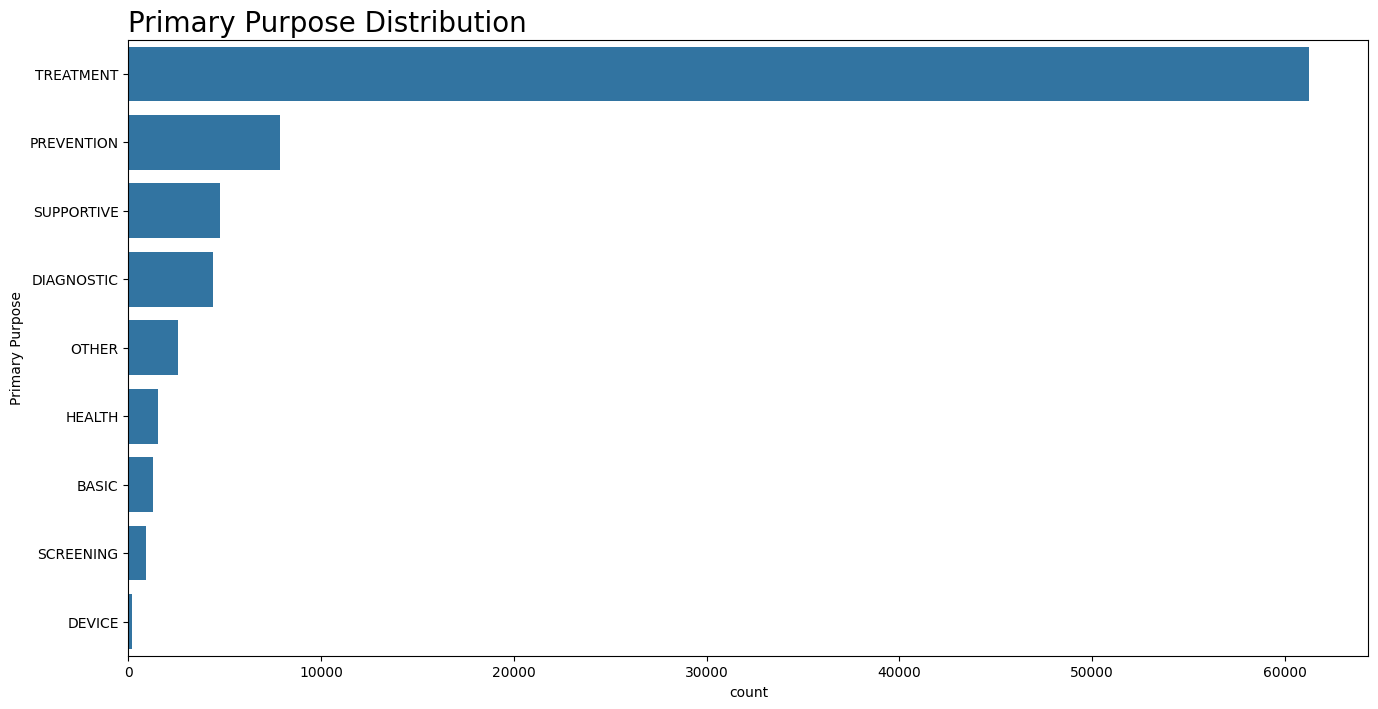

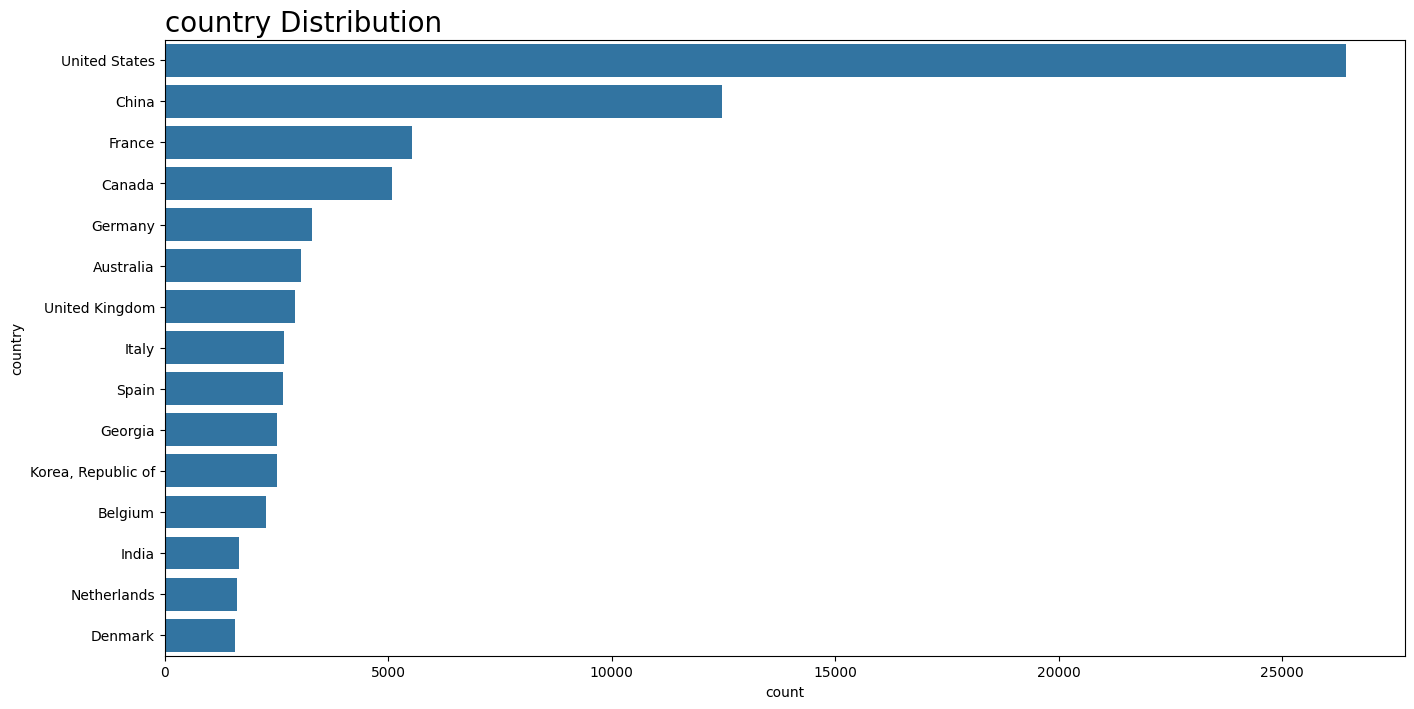

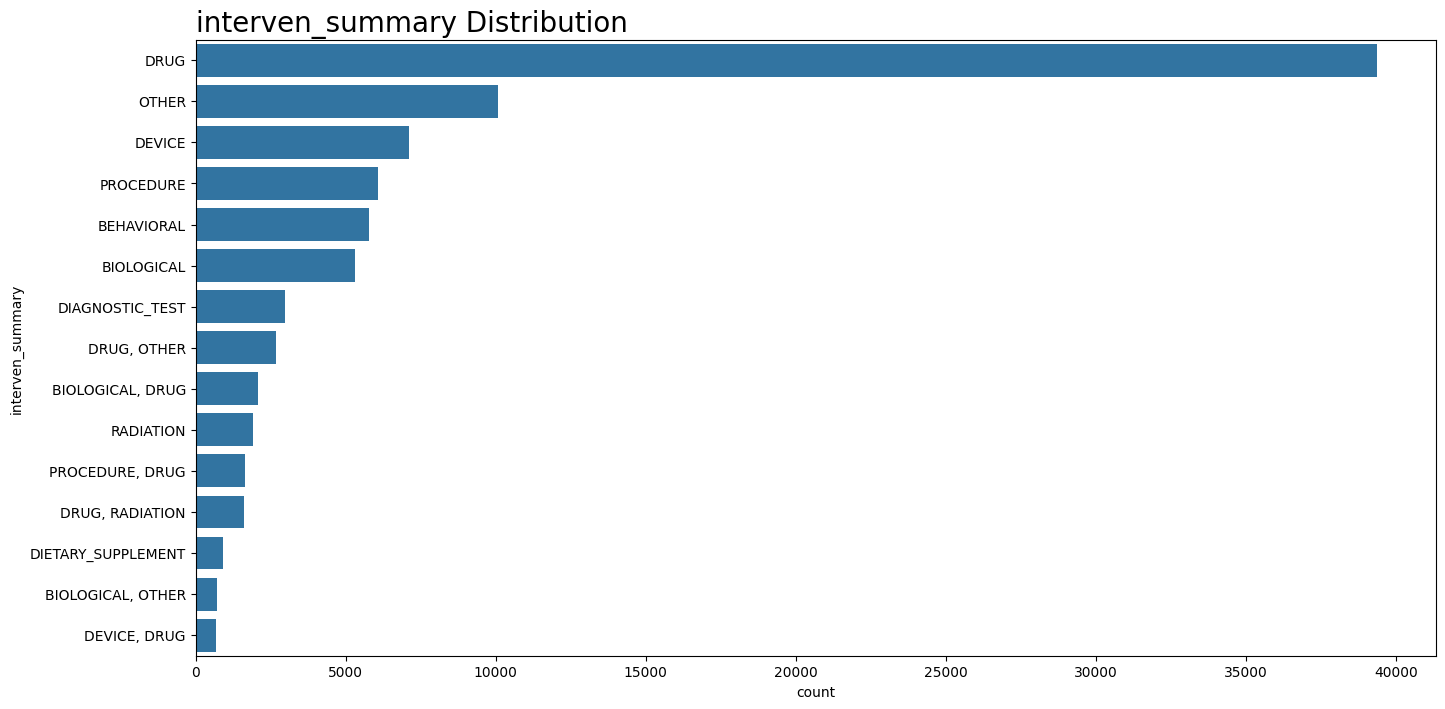

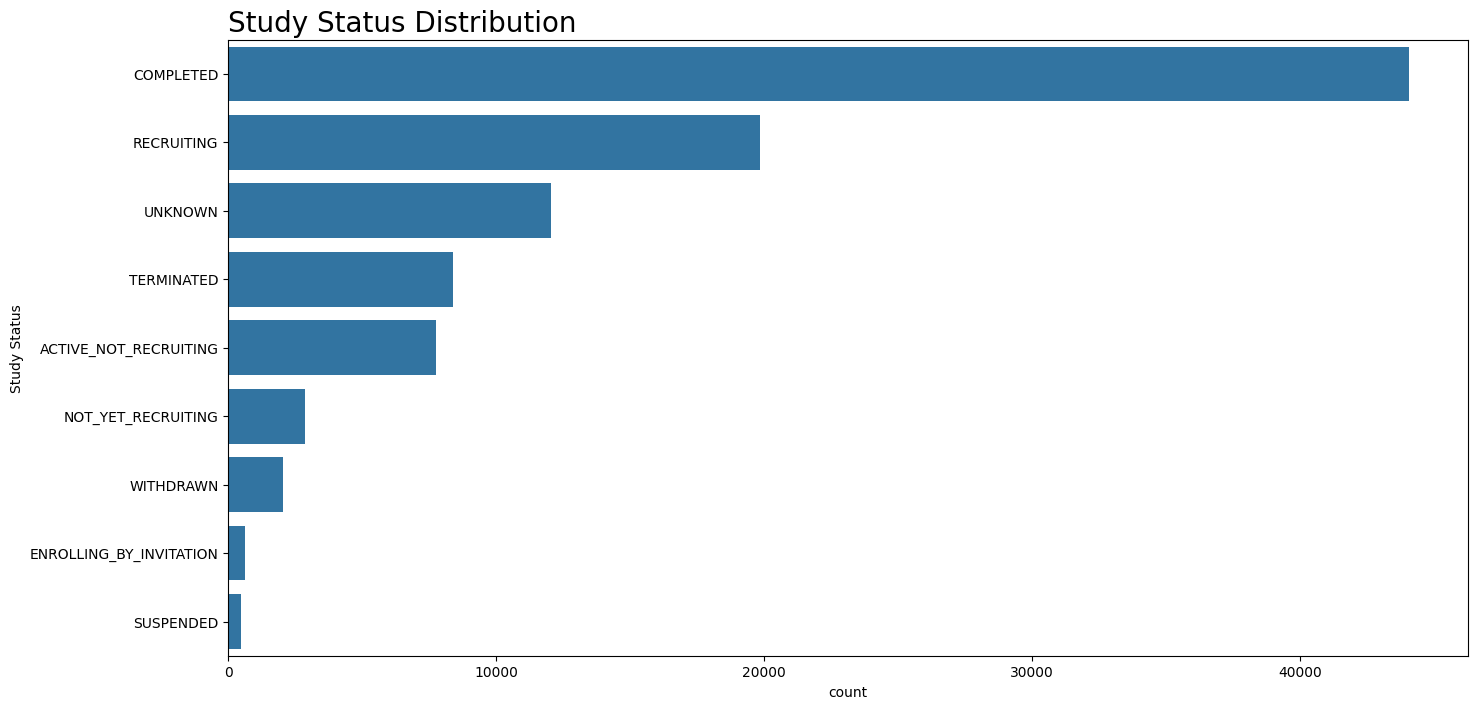

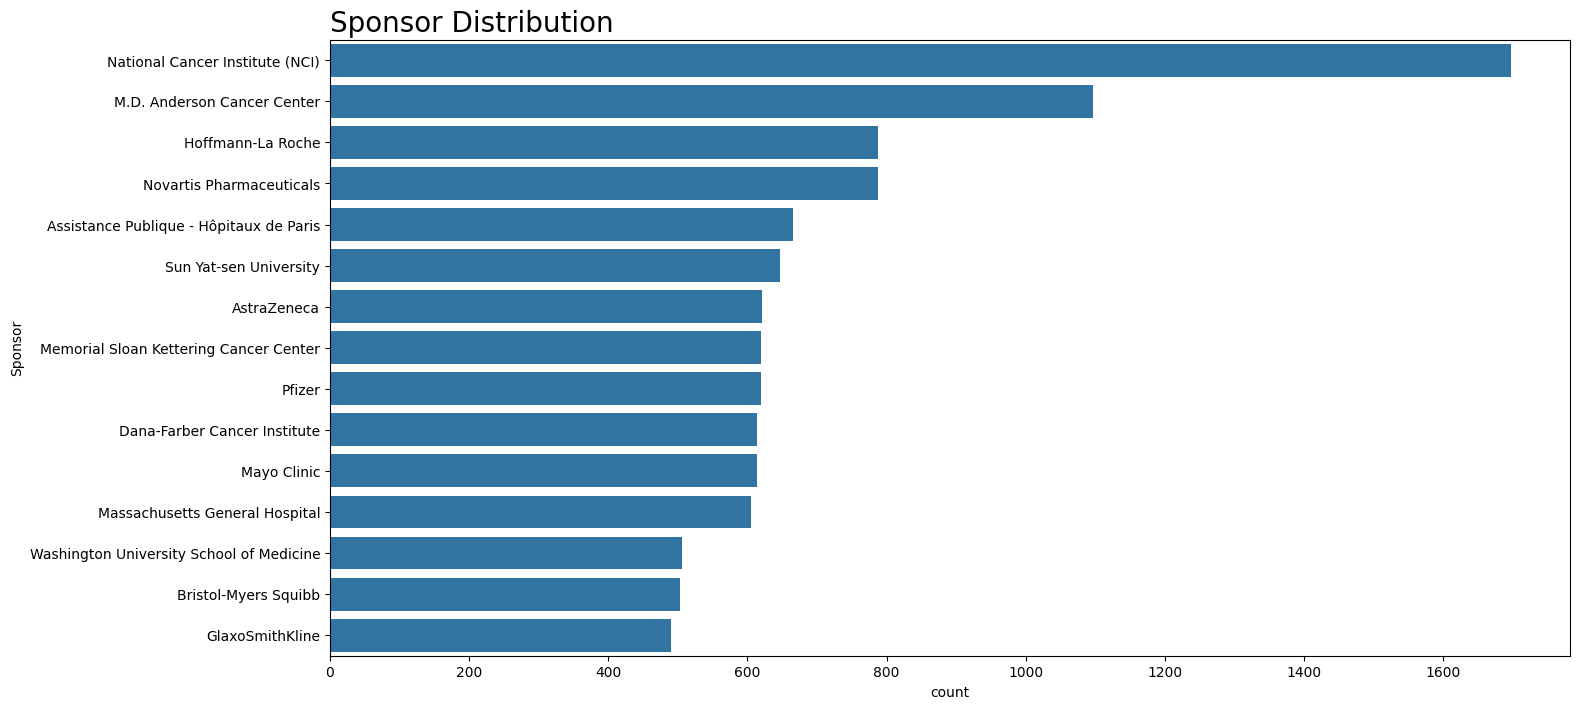

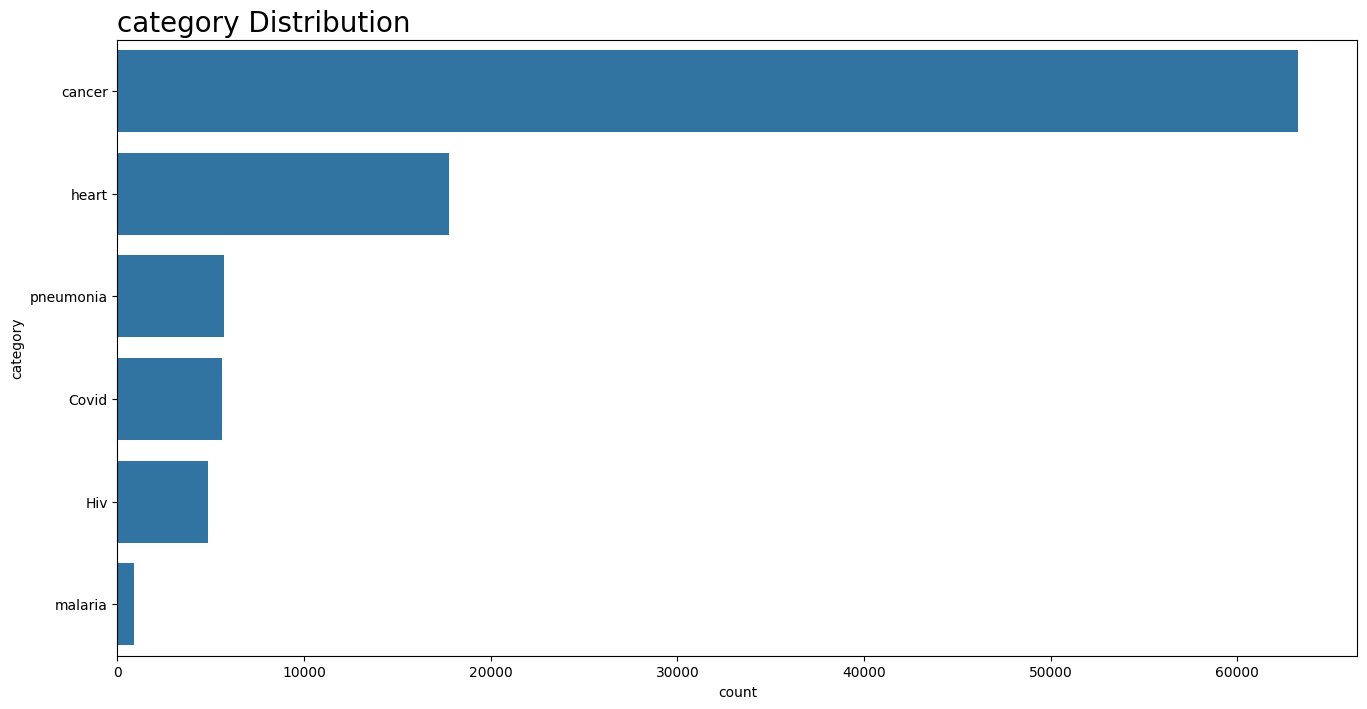

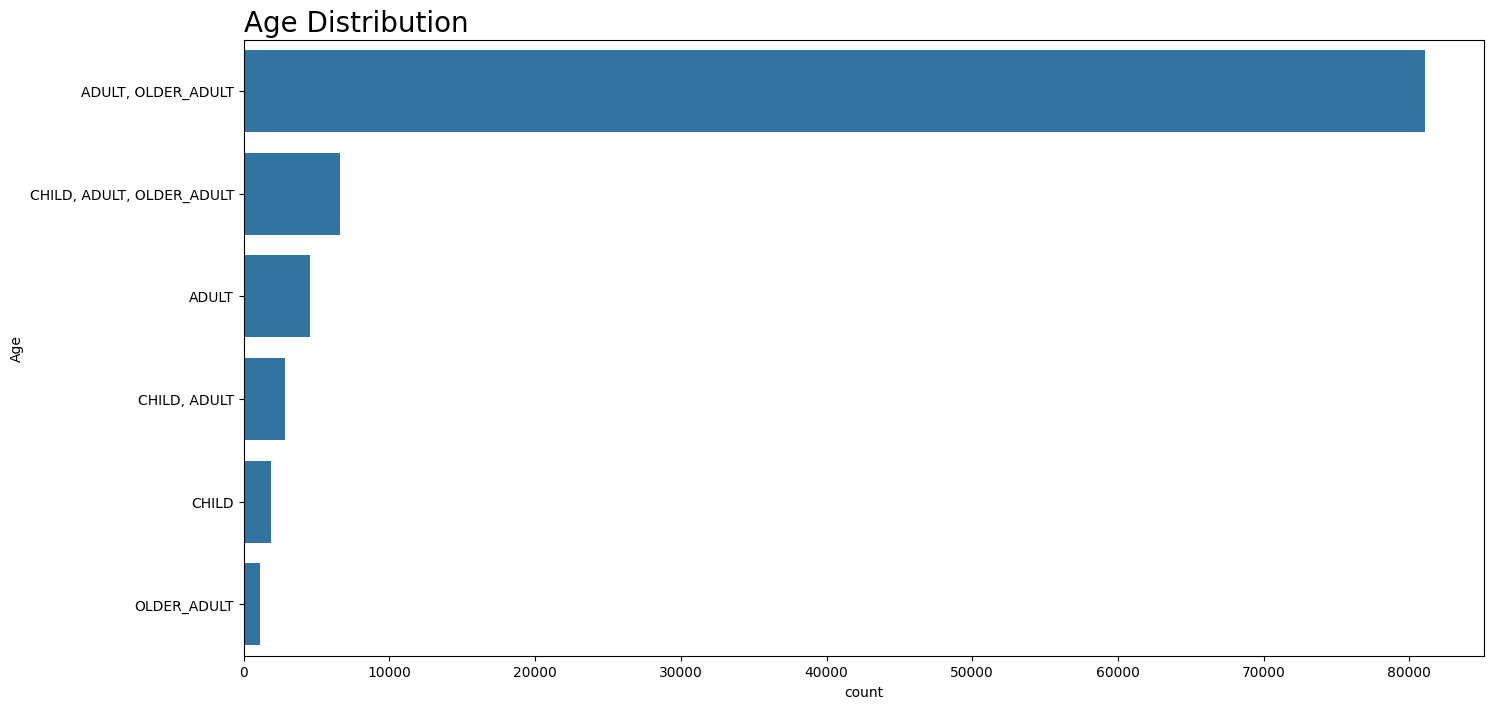

In [401]:
colss = ["Primary Purpose","country","interven_summary","Study Status","Sponsor","category","Age"]

# plotting the distribution of the above columns
for col in colss:
    hoz_plot(df,col,limit=15)

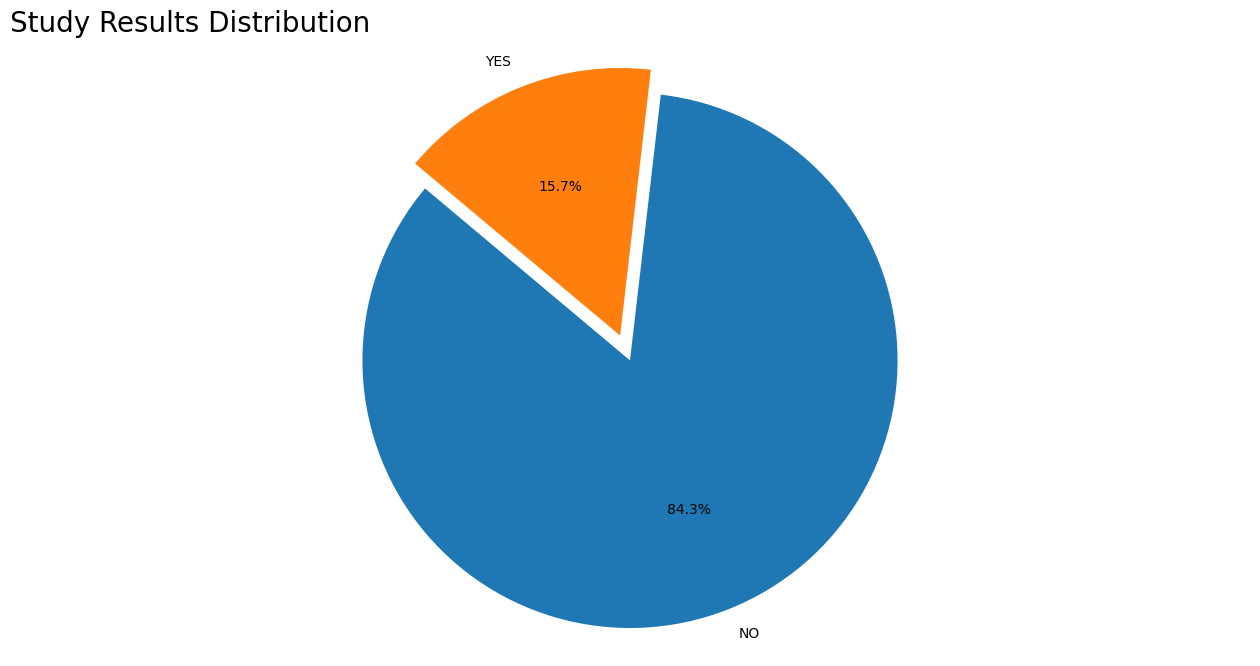

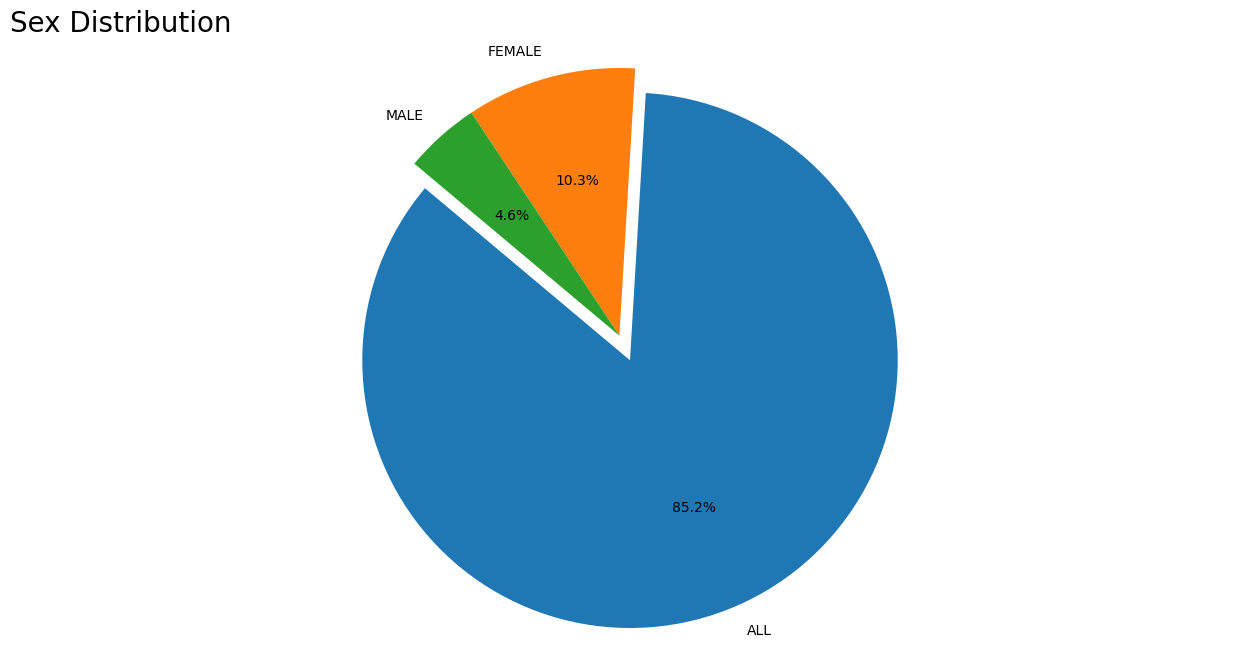

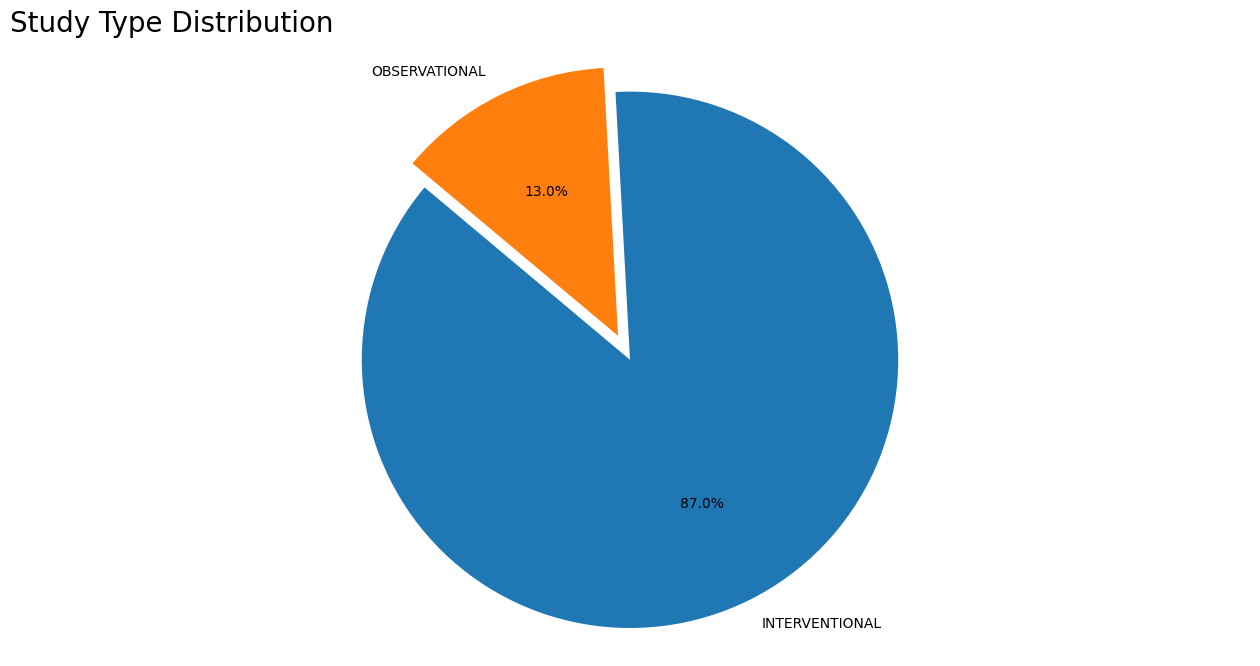

In [402]:
cols = ["Study Results","Sex","Study Type"]

for col in cols:
    pie_chart(df,col)

In [415]:
df.columns

Index(['NCT Number', 'Study Title', 'Study URL', 'Study Status',
       'Brief Summary', 'Study Results', 'Conditions', 'Interventions',
       'Primary Outcome Measures', 'Secondary Outcome Measures', 'Sponsor',
       'Sex', 'Age', 'Enrollment', 'Funder Type', 'Study Type', 'Study Design',
       'Start Date', 'Completion Date', 'Last Update Posted', 'Locations',
       'category', 'start_year', 'completion_year', 'last_year_posted',
       'duration', 'Primary Purpose', 'country', 'description',
       'interven_summary', 'type'],
      dtype='object')

### Bivariate Analysis


In [531]:
# plotting top 10 by certain categories
def bar_plot(df,column1,column2):
    """A function that plot an horizontal bar graph"""

    viz_df = df.groupby([column1])[column2].sum().sort_values(ascending=False).head(10)

# Extract the data for x (countries) and y (Enrollment values)
    x = viz_df.index
    y = viz_df.values

# Choose a sequential colormap (e.g., 'Blues')
    cmap = cm.get_cmap('Blues')

# Create a horizontal bar plot with the chosen colormap
    plt.figure(figsize=(16,8))  # Adjust the figure size as needed
    bars = plt.barh(x, y, color=cmap(y / max(y)))
    plt.xlabel(f"Total {column1}")
    plt.ylabel(f"{column2}")
    plt.title(f"Top 10 {column1} by Total {column2}",loc="left")
    plt.gca().invert_yaxis()  # Reverse the order to show the highest value at the top

# Create a ScalarMappable object and specify the color normalization
    norm = Normalize(vmin=min(y), vmax=max(y))
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])

# Specify the axes for the colorbar
    cbar = plt.colorbar(sm, ax=plt.gca())



# plotting top 10 by certain categories
def bar_plot_avg(df,column1,column2):
    """A function that plot an horizontal bar graph"""

    viz_df = df.groupby([column1])[column2].mean().sort_values(ascending=False).head(10)

# Extract the data for x (countries) and y (Enrollment values)
    x = viz_df.index
    y = viz_df.values

# Choose a sequential colormap (e.g., 'Blues')
    cmap = cm.get_cmap('Blues')

# Create a horizontal bar plot with the chosen colormap
    plt.figure(figsize=(16,8))  # Adjust the figure size as needed
    bars = plt.barh(x, y, color=cmap(y / max(y)))
    plt.xlabel(f"Total {column1}")
    plt.ylabel(f"{column2}")
    plt.title(f"Top 10 {column1} by Total {column2}",loc="left")
    plt.gca().invert_yaxis()  # Reverse the order to show the highest value at the top

# Create a ScalarMappable object and specify the color normalization
    norm = Normalize(vmin=min(y), vmax=max(y))
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])

# Specify the axes for the colorbar
    cbar = plt.colorbar(sm, ax=plt.gca())


# creating a stacked bar to show relationship
def stacked_bar(df,column1,column2):

    df_percentages = df.groupby([column1, column2]).size() / df.groupby(column2).size() * 100
    df_percentages = df_percentages.reset_index(name="Percentage")

    # Create a stacked bar chart to visualize the percentages
    plt.figure(figsize=(16, 8))
    sns.barplot(data=df_percentages, x=column2, y="Percentage", hue=column1, palette="Set1")

    # Optionally, you can further customize the plot
    plt.title(f"Stacked Bar Chart of{column1} Distribution by {column2} (Percentages)",loc="left",dodge=False)
    plt.xlabel(f"{column1}")
    plt.ylabel("Percentage")
    plt.legend(title="Category", loc="upper right")

     #Show the plot
    plt.show()

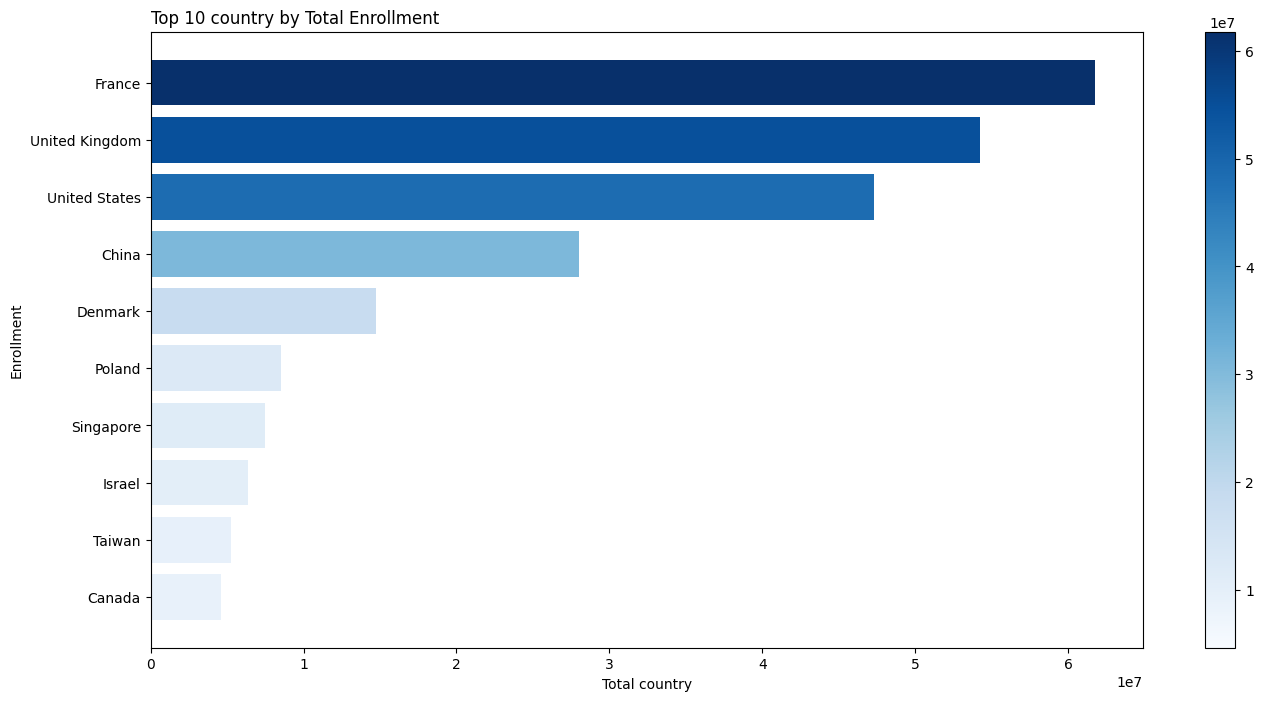

In [532]:
bar_plot(df,"country","Enrollment")

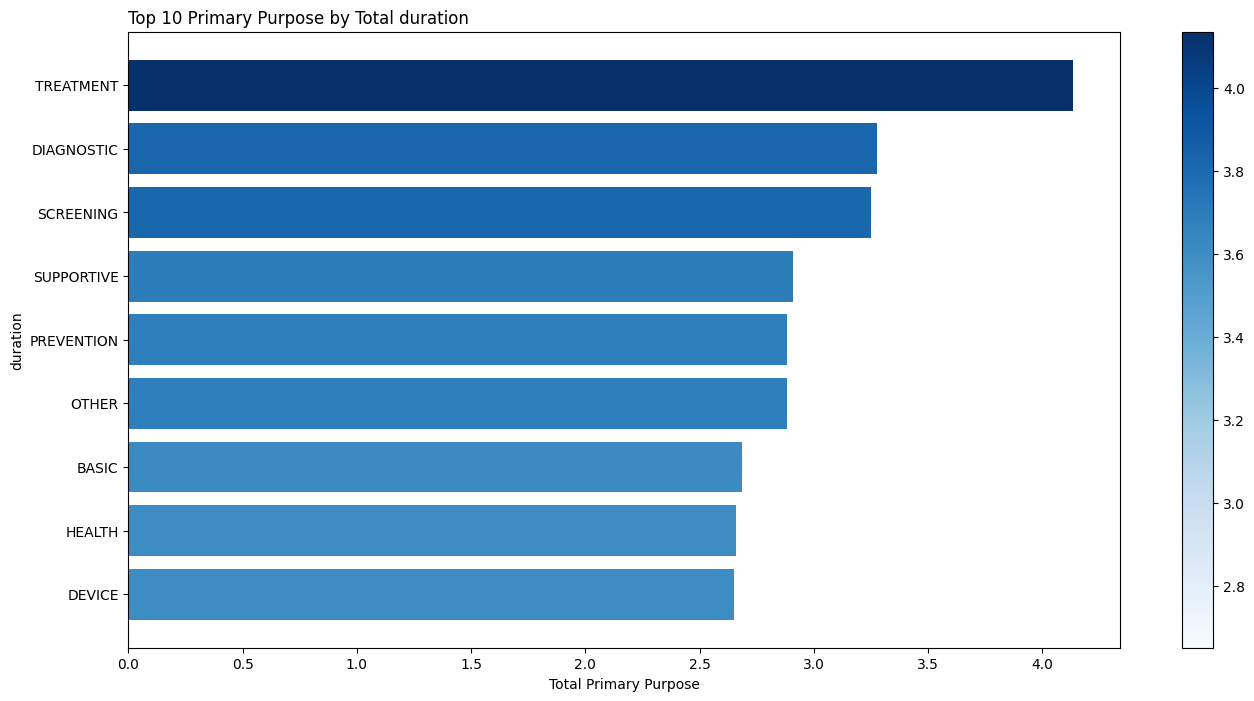

In [533]:
bar_plot_avg(df,"Primary Purpose","duration")

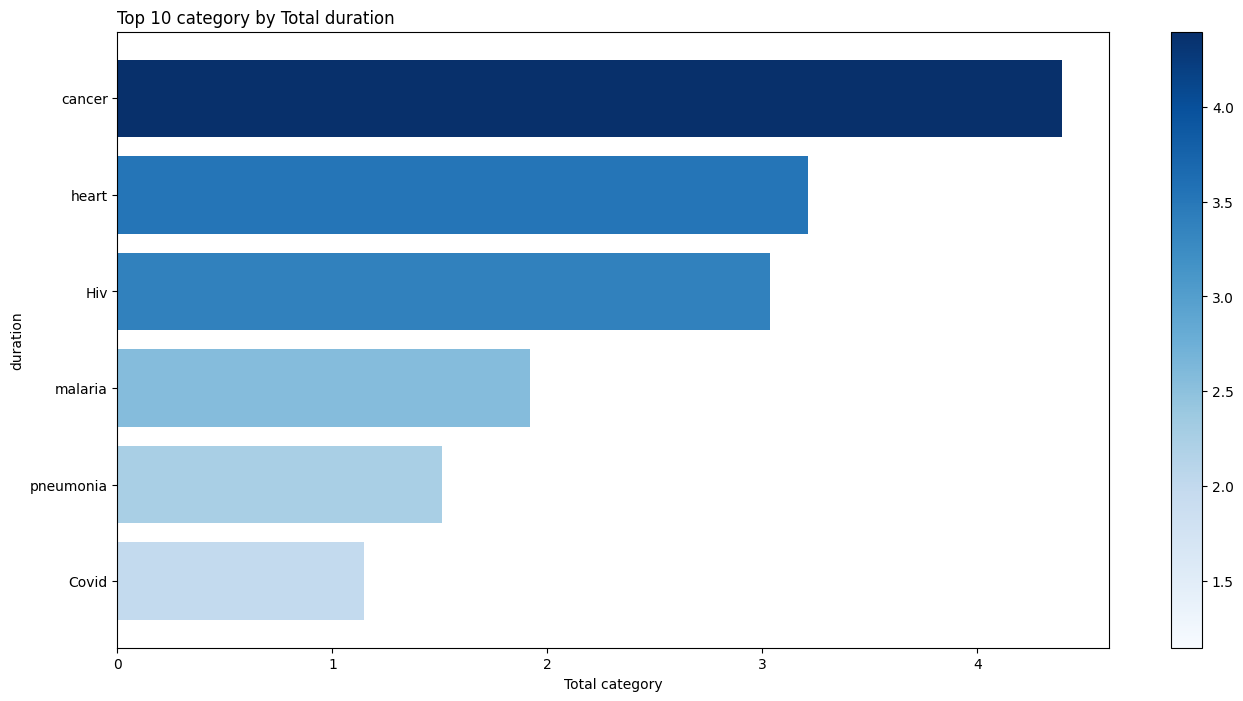

In [534]:
bar_plot_avg(df,"category","duration")

In [535]:
df.head(1)

,NCT Number,Study Title,Study URL,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,...,category,start_year,completion_year,last_year_posted,duration,Primary Purpose,country,description,interven_summary,type
0,NCT00291525,Randomized On-X Anticoagulation Trial,https://clinicaltrials.gov/study/NCT00291525,ACTIVE_NOT_RECRUITING,Various patient groups with the On-X Valve can...,NO,Heart Valve Disease,DEVICE: On-X valve using reduced anticoagulati...,"Thromboembolism, Rate of thromboembolism evalu...","Valve-Related Events, Rates of other valve-rel...",...,heart,2006,2022,2022,16,PREVENTION,Canada,DEVICE: On-X valve using reduced anticoagulati...,DEVICE,: On-X valve using reduced anticoagulation|: O...


AttributeError: Text.set() got an unexpected keyword argument 'dodge'

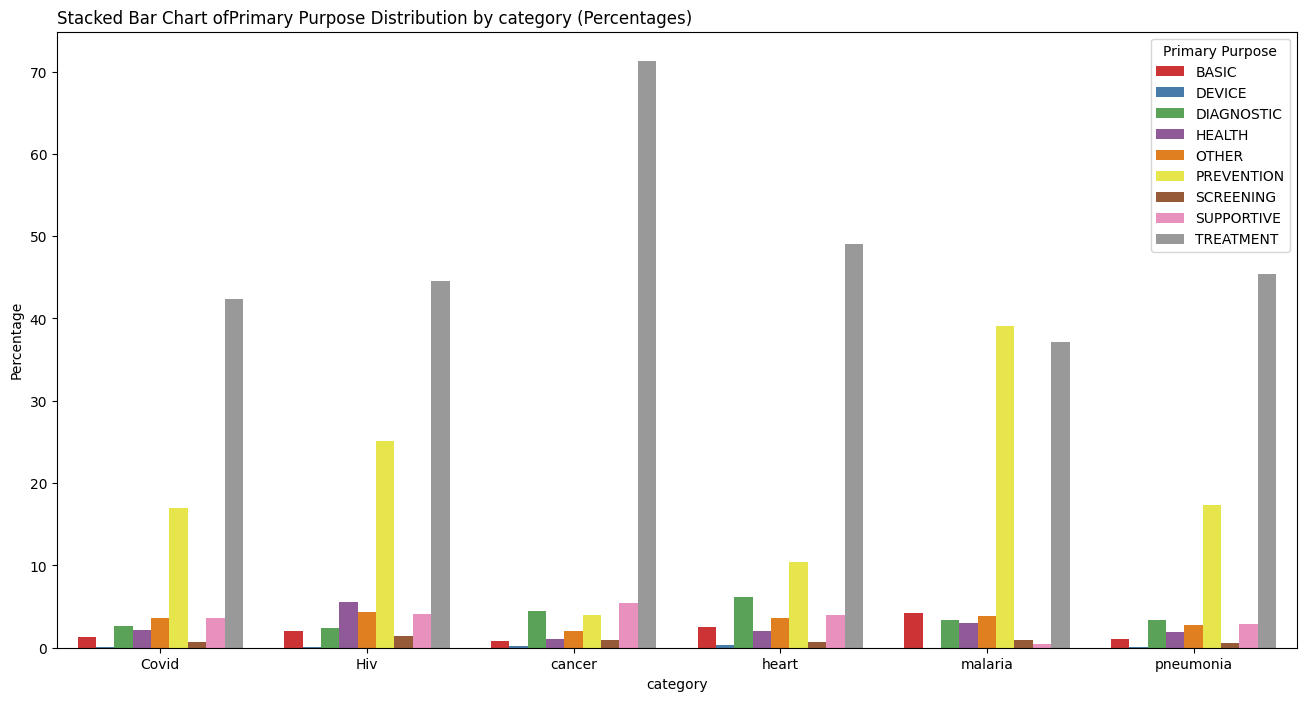

In [536]:
stacked_bar(df,"Primary Purpose","category")

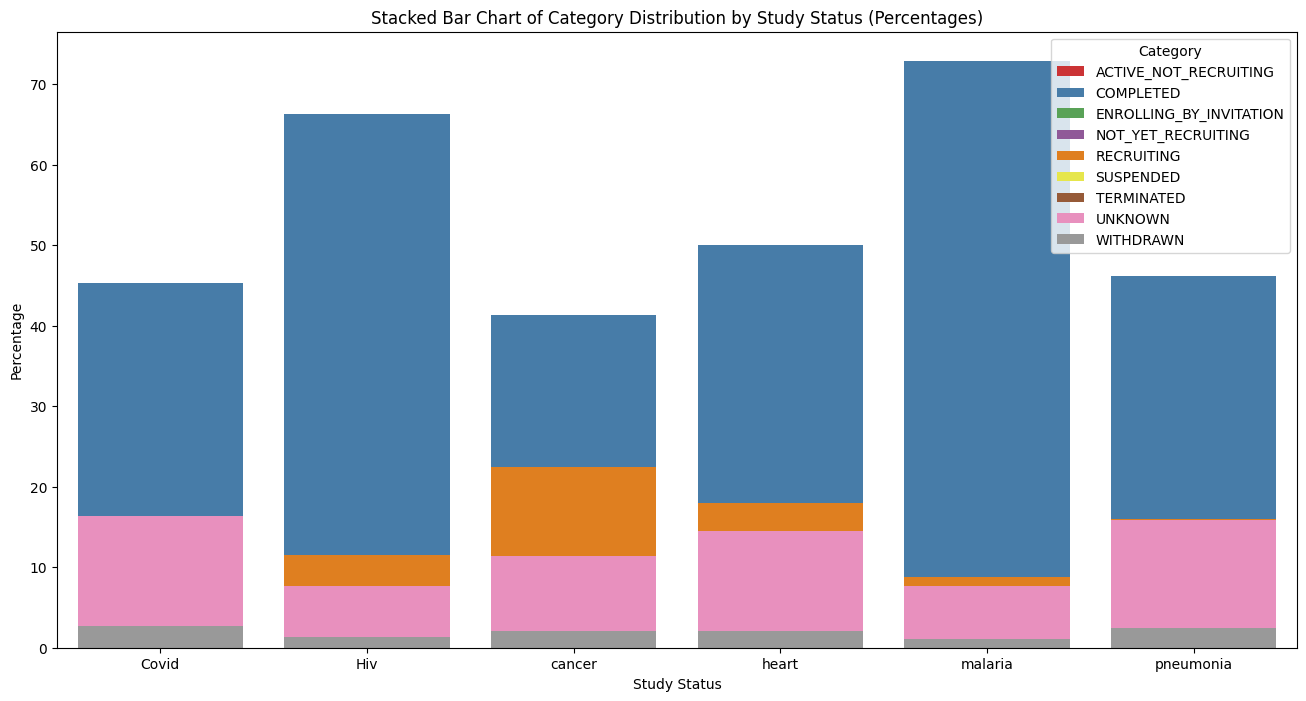

In [ ]:

df_percentages = df.groupby(["Study Status", "category"]).size() / df.groupby("category").size() * 100
df_percentages = df_percentages.reset_index(name="Percentage")

# Create a stacked bar chart to visualize the percentages
plt.figure(figsize=(16, 8))
sns.barplot(data=df_percentages, x="category", y="Percentage", hue="Study Status", palette="Set1",dodge=False)

# Optionally, you can further customize the plot
plt.title("Stacked Bar Chart of Category Distribution by Study Status (Percentages)")
plt.xlabel("Study Status")
plt.ylabel("Percentage")
plt.legend(title="Category", loc="upper right")

# Show the plot
plt.show()







In [ ]:
df.head()

,NCT Number,Study Title,Study URL,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,...,category,start_year,completion_year,last_year_posted,duration,Primary Purpose,country,description,interven_summary,type
0,NCT00291525,Randomized On-X Anticoagulation Trial,https://clinicaltrials.gov/study/NCT00291525,ACTIVE_NOT_RECRUITING,Various patient groups with the On-X Valve can...,NO,Heart Valve Disease,DEVICE: On-X valve using reduced anticoagulati...,"Thromboembolism, Rate of thromboembolism evalu...","Valve-Related Events, Rates of other valve-rel...",...,heart,2006,2022,2022,16,PREVENTION,Canada,DEVICE: On-X valve using reduced anticoagulati...,DEVICE,: On-X valve using reduced anticoagulation|: O...
1,NCT03419325,A Genomic Approach for Clopidogrel in Caribbea...,https://clinicaltrials.gov/study/NCT03419325,ACTIVE_NOT_RECRUITING,Clopidogrel is a prescription medicine used to...,NO,Cardiovascular Disease (CVD)|Stroke|Acute Coro...,GENETIC: CYP2C19 test|DIAGNOSTIC_TEST: P2RY12 ...,Major adverse cardiovascular events (MACE) red...,number of patients with treatment-related card...,...,heart,2020,2023,2023,3,BASIC,Puerto Rico,GENETIC: CYP2C19 test|DIAGNOSTIC_TEST: P2RY12 ...,"DIAGNOSTIC_TEST, GENETIC",GENETIC: CYP2C19 test|DIAGNOSTIC_TEST: P2RY12 ...
5,NCT03940625,Anthracycline Induced Cardiotoxicity - Early D...,https://clinicaltrials.gov/study/NCT03940625,COMPLETED,Anthracyclines (e.g. Doxorubicin) are an impor...,NO,Breast Cancer|Myocardial Damage|Cardiotoxicity,DIAGNOSTIC_TEST: Cardiac MRI and echocardiogra...,reduction of the left ventricular ejection fra...,reduction of the left ventricular global longi...,...,heart,2015,2022,2022,7,DIAGNOSTIC,Germany,DIAGNOSTIC_TEST: Cardiac MRI and echocardiogra...,DIAGNOSTIC_TEST,": Cardiac MRI and echocardiography, laboratory..."
7,NCT04032925,The Pressure-controlled Intermittent Coronary ...,https://clinicaltrials.gov/study/NCT04032925,TERMINATED,The PICSO ViPER study is a prospective single ...,NO,Myocardial Infarction,DEVICE: PICSO,End-systolic pressure volume relationship (ESP...,"Transcoronary gradient of lactates levels, Car...",...,heart,2021,2022,2023,1,OTHER,United Kingdom,DEVICE: PICSO,DEVICE,: PICSO
8,NCT03458325,Furoscix Real-World Evaluation for Decreasing ...,https://clinicaltrials.gov/study/NCT03458325,COMPLETED,The study is to evaluate the safe admission av...,YES,Heart Failure,COMBINATION_PRODUCT: Furoscix Infusor,"Healthcare Utilization Costs, The difference i...","Heart-Failure Related Hospital Admissions, The...",...,heart,2020,2021,2023,1,TREATMENT,India,COMBINATION_PRODUCT: Furoscix Infusor,COMBINATION_PRODUCT,: Furoscix Infusor


## Text column